In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
fashion_df = pd.read_csv(r"C:\Users\ACER\Downloads\product recommander\data\fashion.csv")
fashion_df.head(2)

,ProductId,Gender,Category,SubCategory,ProductType,Colour,Usage,ProductTitle,Image,ImageURL
0,42419,Girls,Apparel,Topwear,Tops,White,Casual,Gini and Jony Girls Knit White Top,42419.jpg,http://assets.myntassets.com/v1/images/style/p...
1,34009,Girls,Apparel,Topwear,Tops,Black,Casual,Gini and Jony Girls Black Top,34009.jpg,http://assets.myntassets.com/v1/images/style/p...


In [7]:
print("Total number of products : ", fashion_df.shape[0])
print("Total number of unique subcategories : ", fashion_df["SubCategory"].nunique())
print("Total number of unique gender types : ", fashion_df["Gender"].nunique())

Total number of products :  2906
Total number of unique subcategories :  9
Total number of unique gender types :  4


In [8]:
fashion_df["Gender"].value_counts()

Gender
Men      811
Women    769
Boys     759
Girls    567
Name: count, dtype: int64

In [9]:
apparel_boys = fashion_df[fashion_df["Gender"]=="Boys"]
apparel_girls = fashion_df[fashion_df["Gender"]=="Girls"]
footwear_men = fashion_df[fashion_df["Gender"]=="Men"]
footwear_women = fashion_df[fashion_df["Gender"]=="Women"]

In [10]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import applications
from datetime import datetime
import os

img_width, img_height = 224, 224

train_data_dir = "C:\\Users\\ACER\\Downloads\\product recommander\\data\\Footwear\\Men\\Images"

nb_train_samples = 811

batch_size = 1

def extract_features():
    Itemcodes = []
    
    datagen = ImageDataGenerator(rescale=1. / 255)
    
    model = applications.ResNet50(include_top=False, weights='imagenet', input_shape=(img_width, img_height, 3))
    
    generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,  
        shuffle=False     
    )
    
    for filename in generator.filenames:
        item_code = filename.split(os.sep)[-1].split('.')[0]  
        Itemcodes.append(item_code)

    all_features = []

    for i in range(nb_train_samples // batch_size):
        batch_images = next(generator)
        
        features = model.predict(batch_images, batch_size=batch_size)
        
        all_features.append(features.flatten())
        
    all_features = np.array(all_features)
    
    np.save('./Men_ResNet_features.npy', all_features)
    np.save('./Men_ResNet_feature_product_ids.npy', np.array(Itemcodes))

start_time = datetime.now()

extract_features()

print("Time taken in feature extraction:", datetime.now() - start_time)


Found 811 images belonging to 1 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

In [12]:
extracted_features = np.load(r'C:\\Users\\ACER\Documents\\ml prjt\\Fashion Recommendation\\Men_ResNet_features.npy')
Productids = np.load(r'C:\\Users\\ACER\\Documents\\ml prjt\\Fashion Recommendation\\Men_ResNet_feature_product_ids.npy')

men = footwear_men.copy()

df_Productids = list(men['ProductId'])

Productids = list(Productids)

==================== input product image ====================


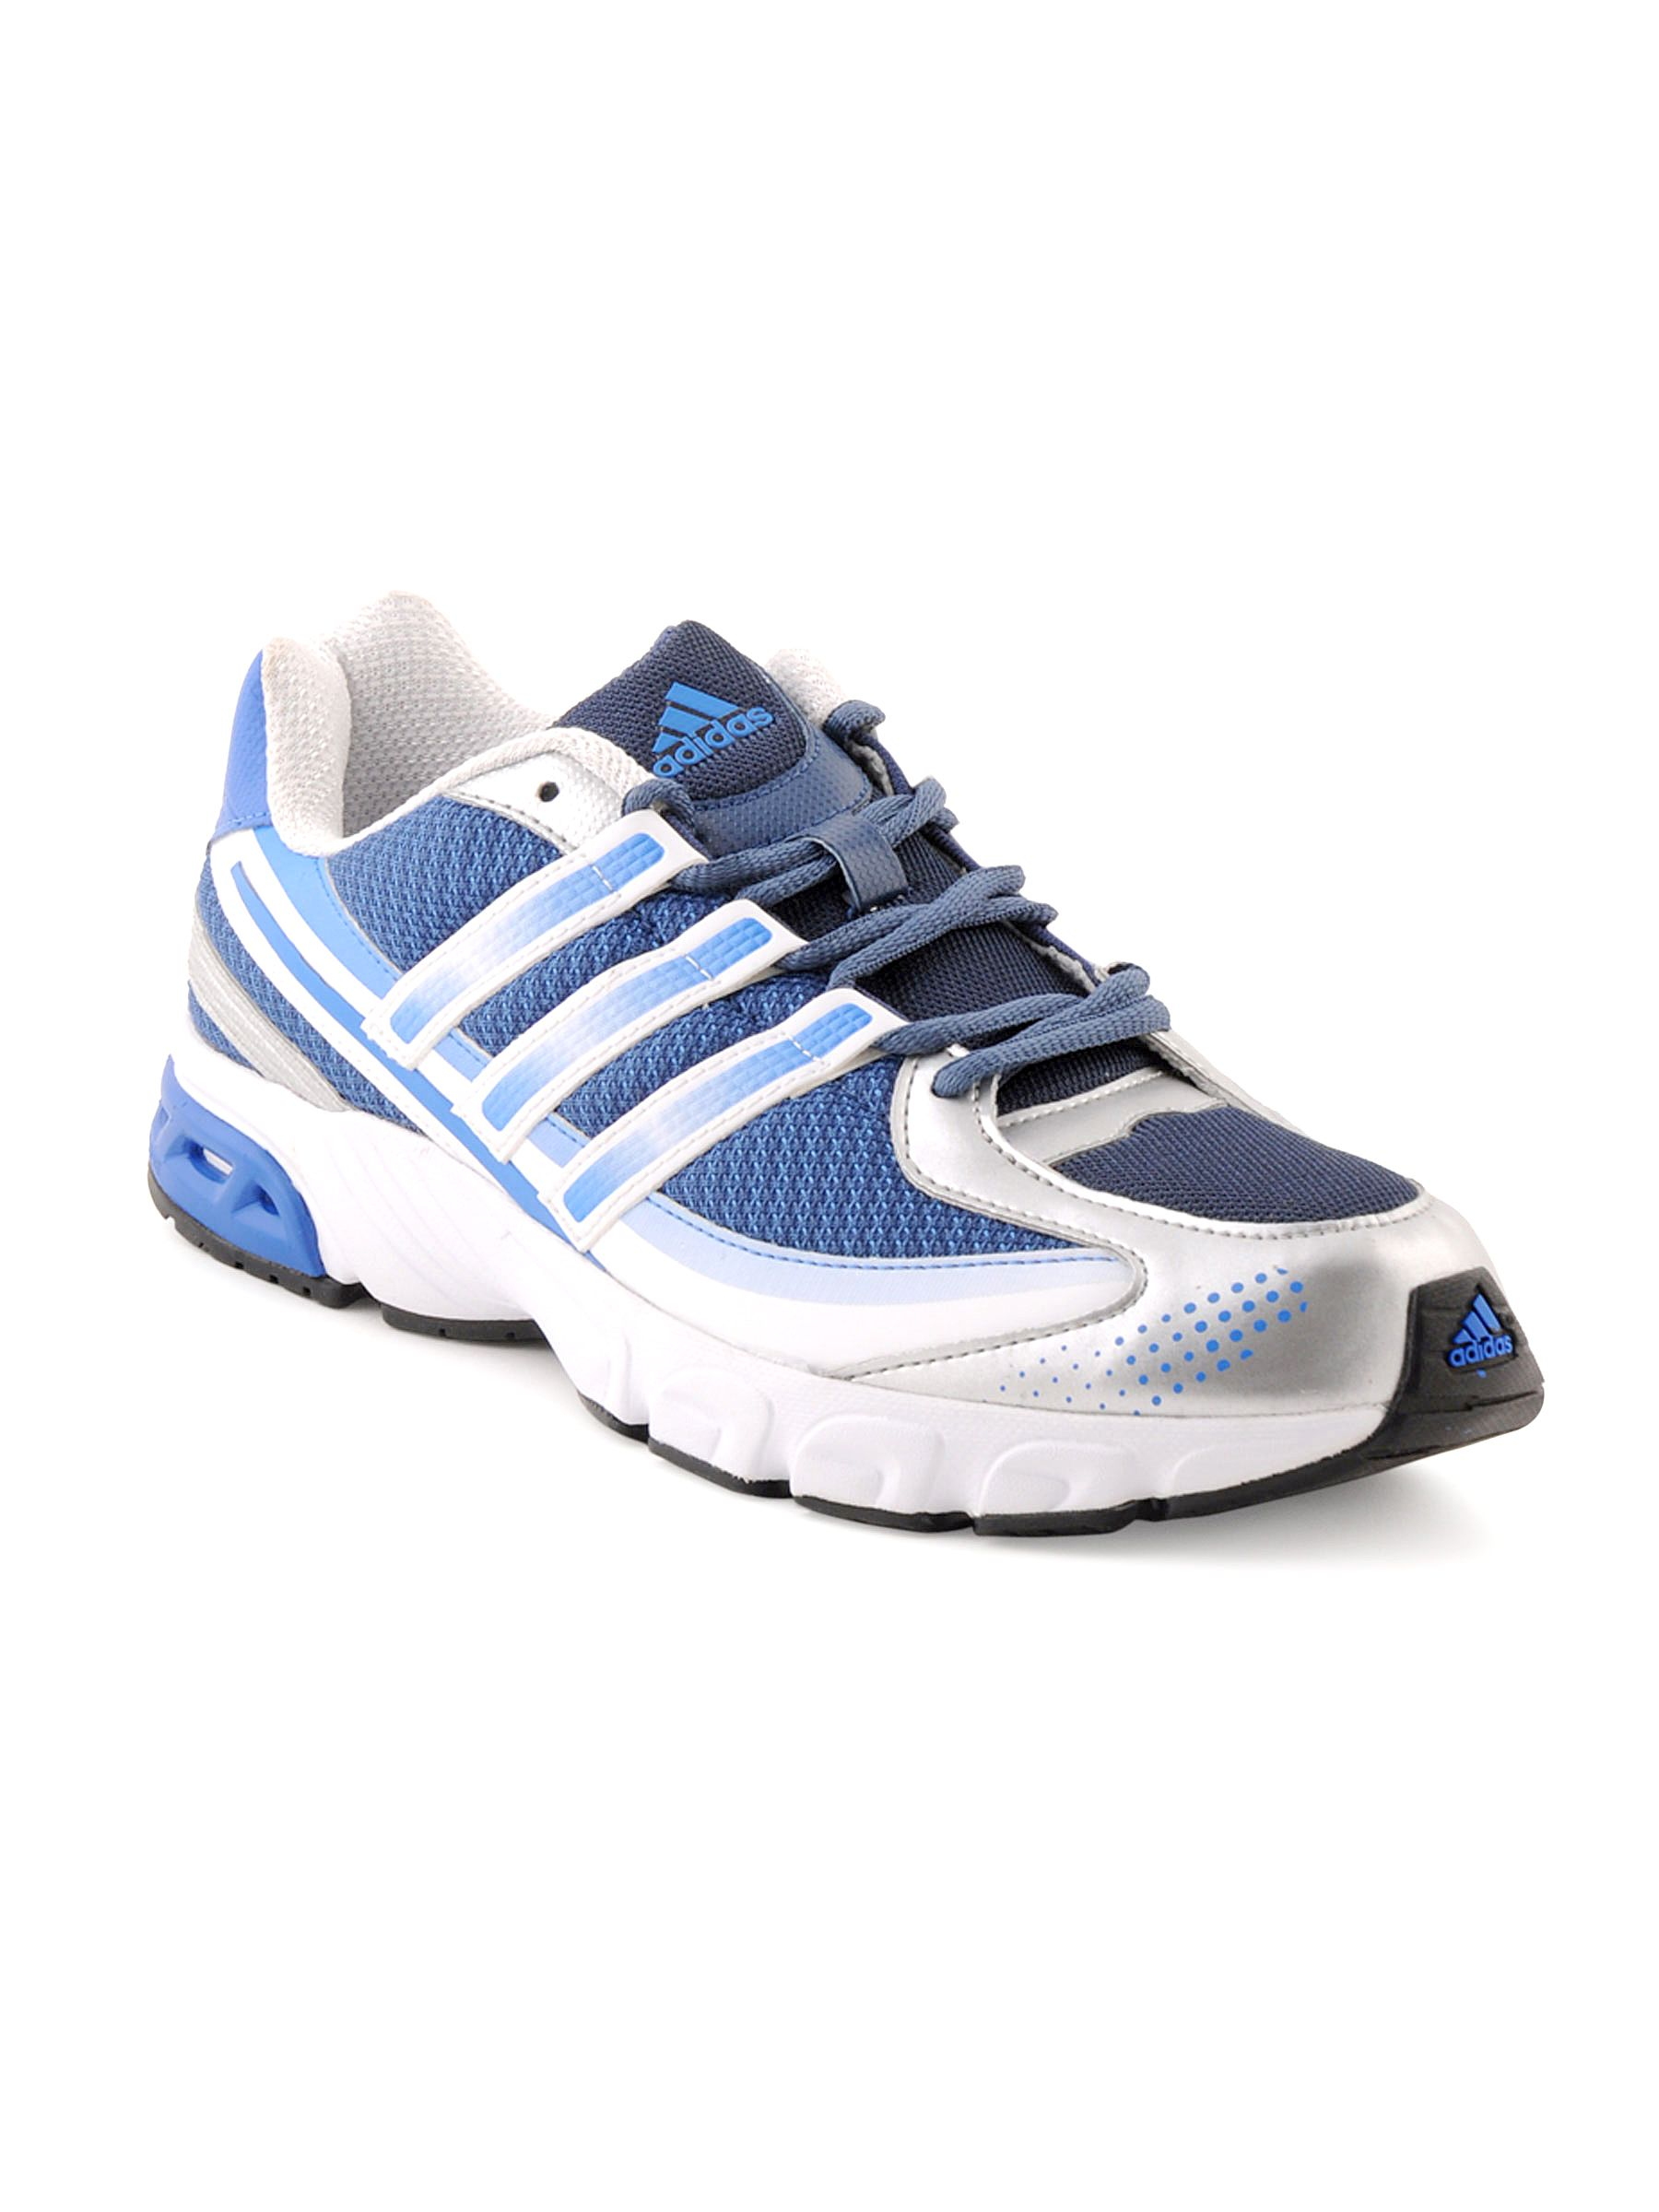

Product Title:  ADIDAS Men Adi Quest Blue Sports Shoes

 ==================== Recommended products ====================


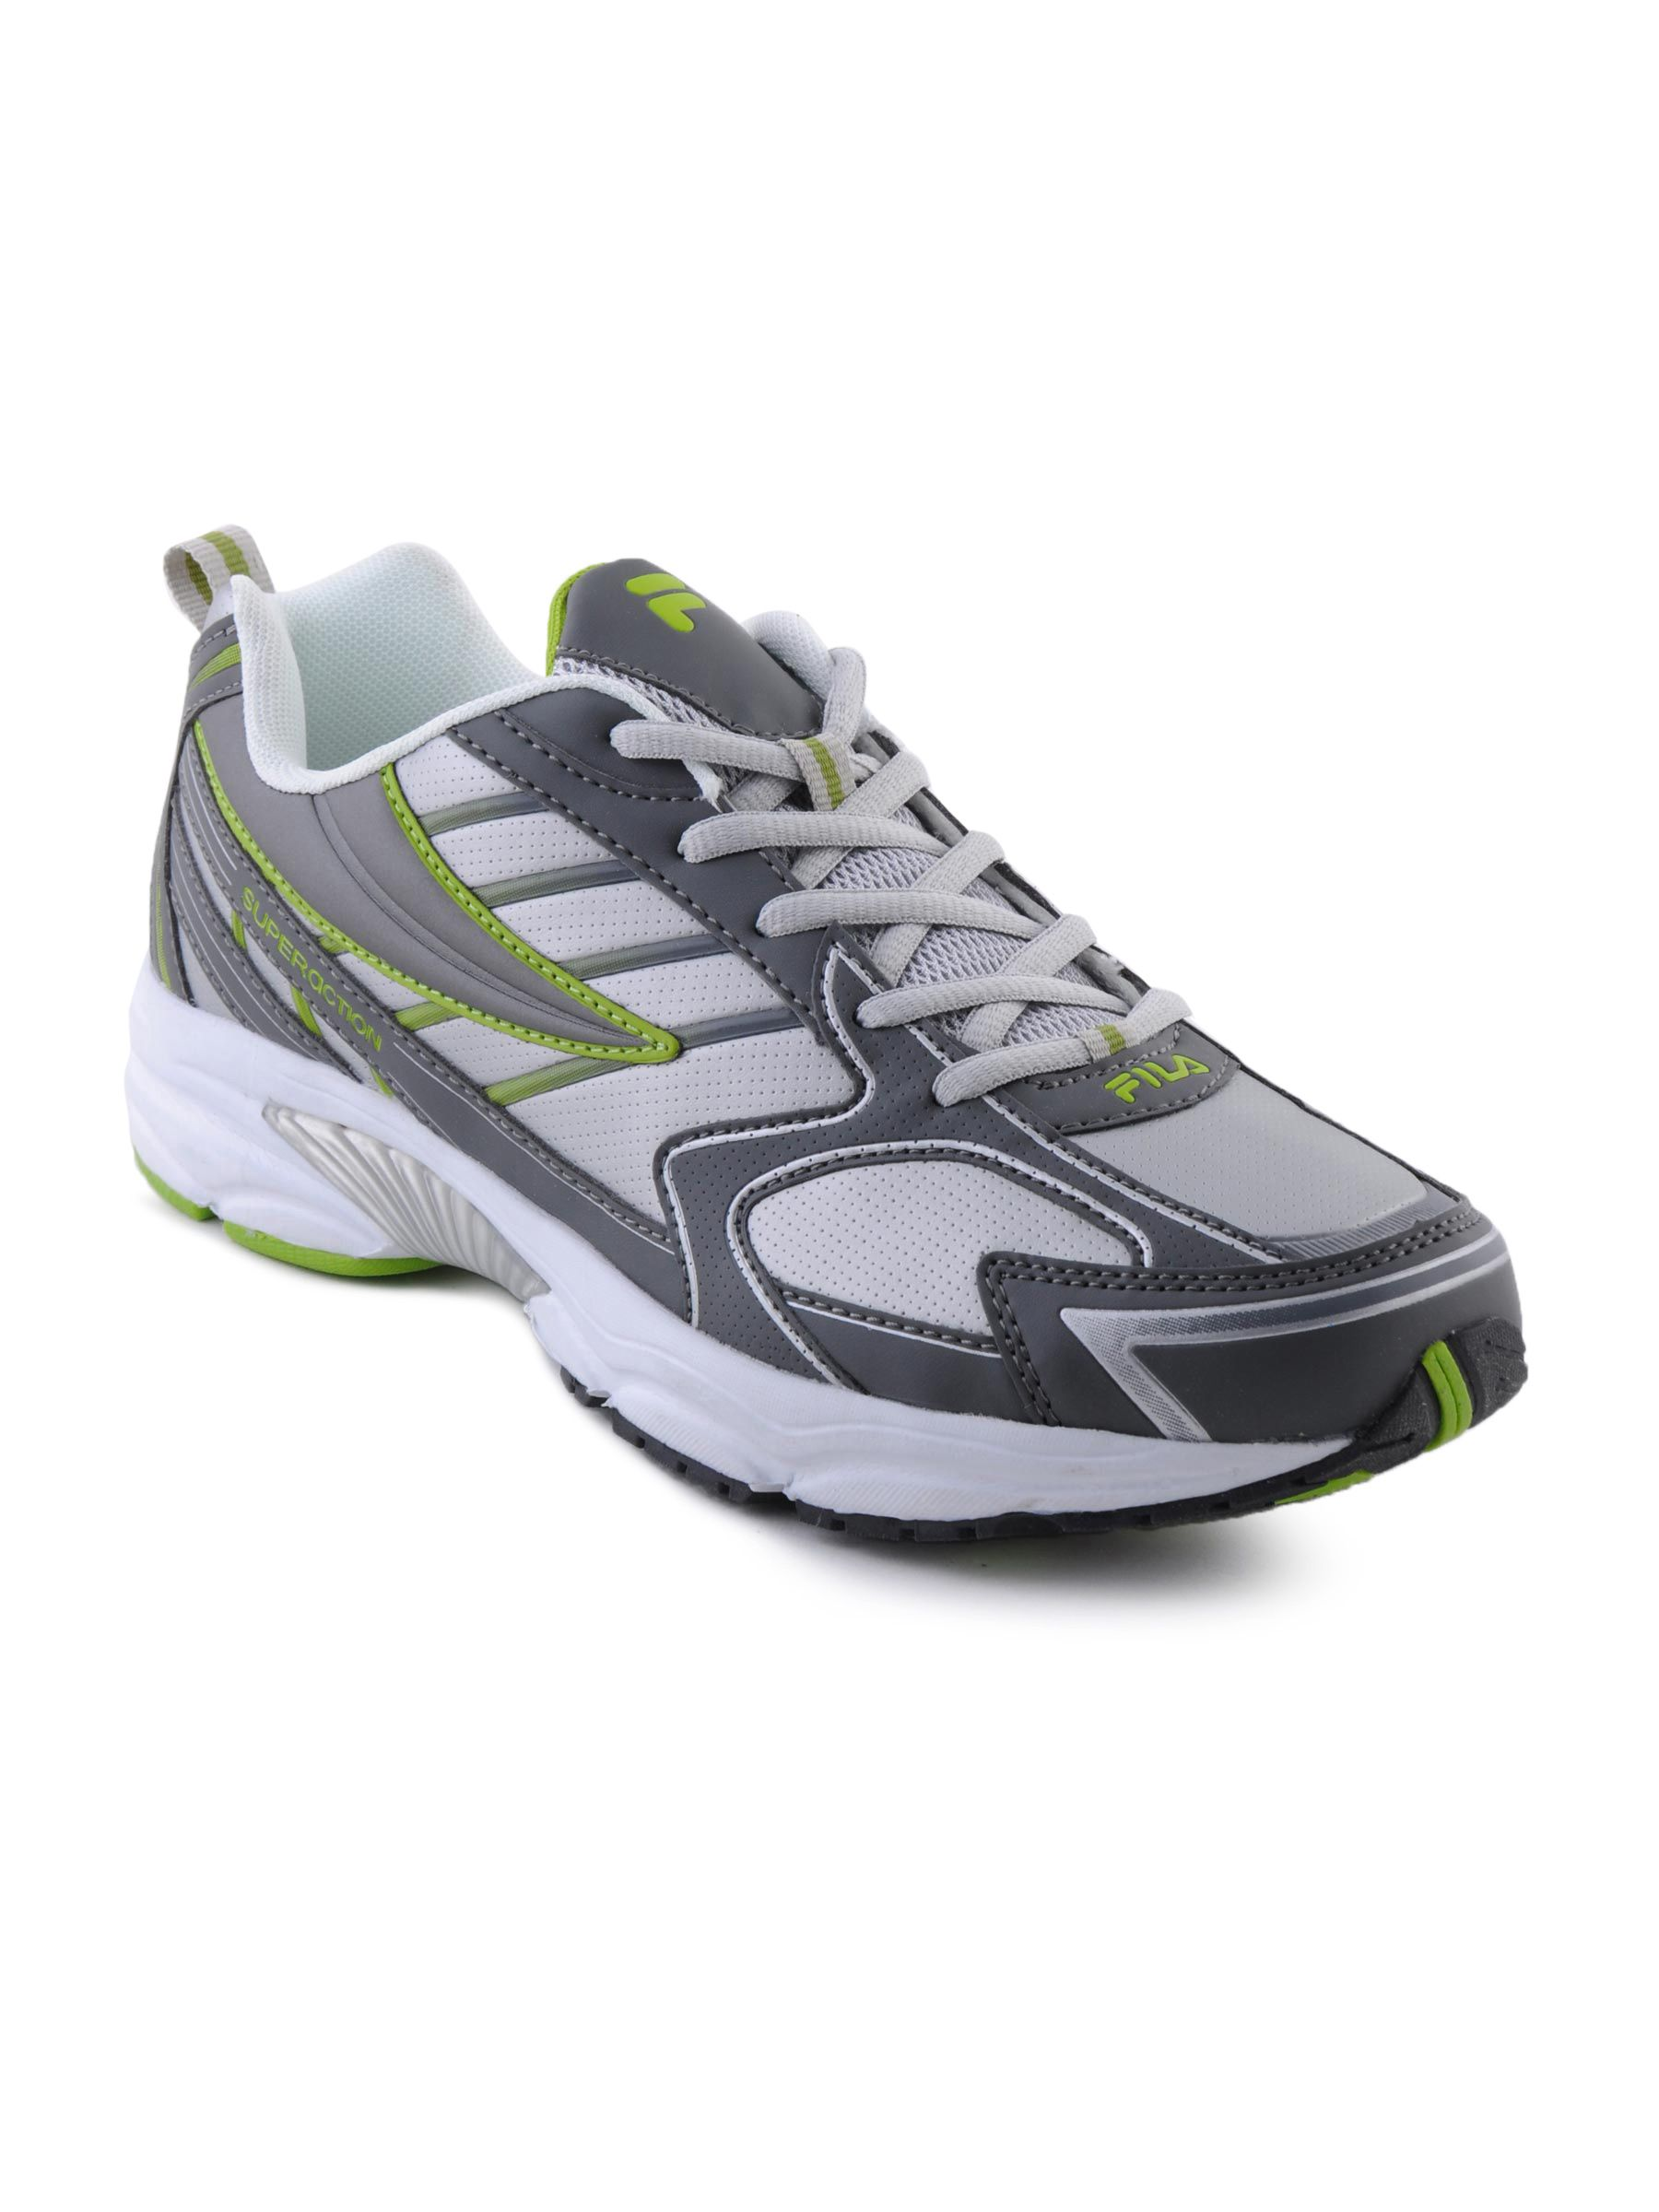

Product Title:  Fila Men Destiny Grey Sports Shoes
Euclidean Distance from input image: 27.646345


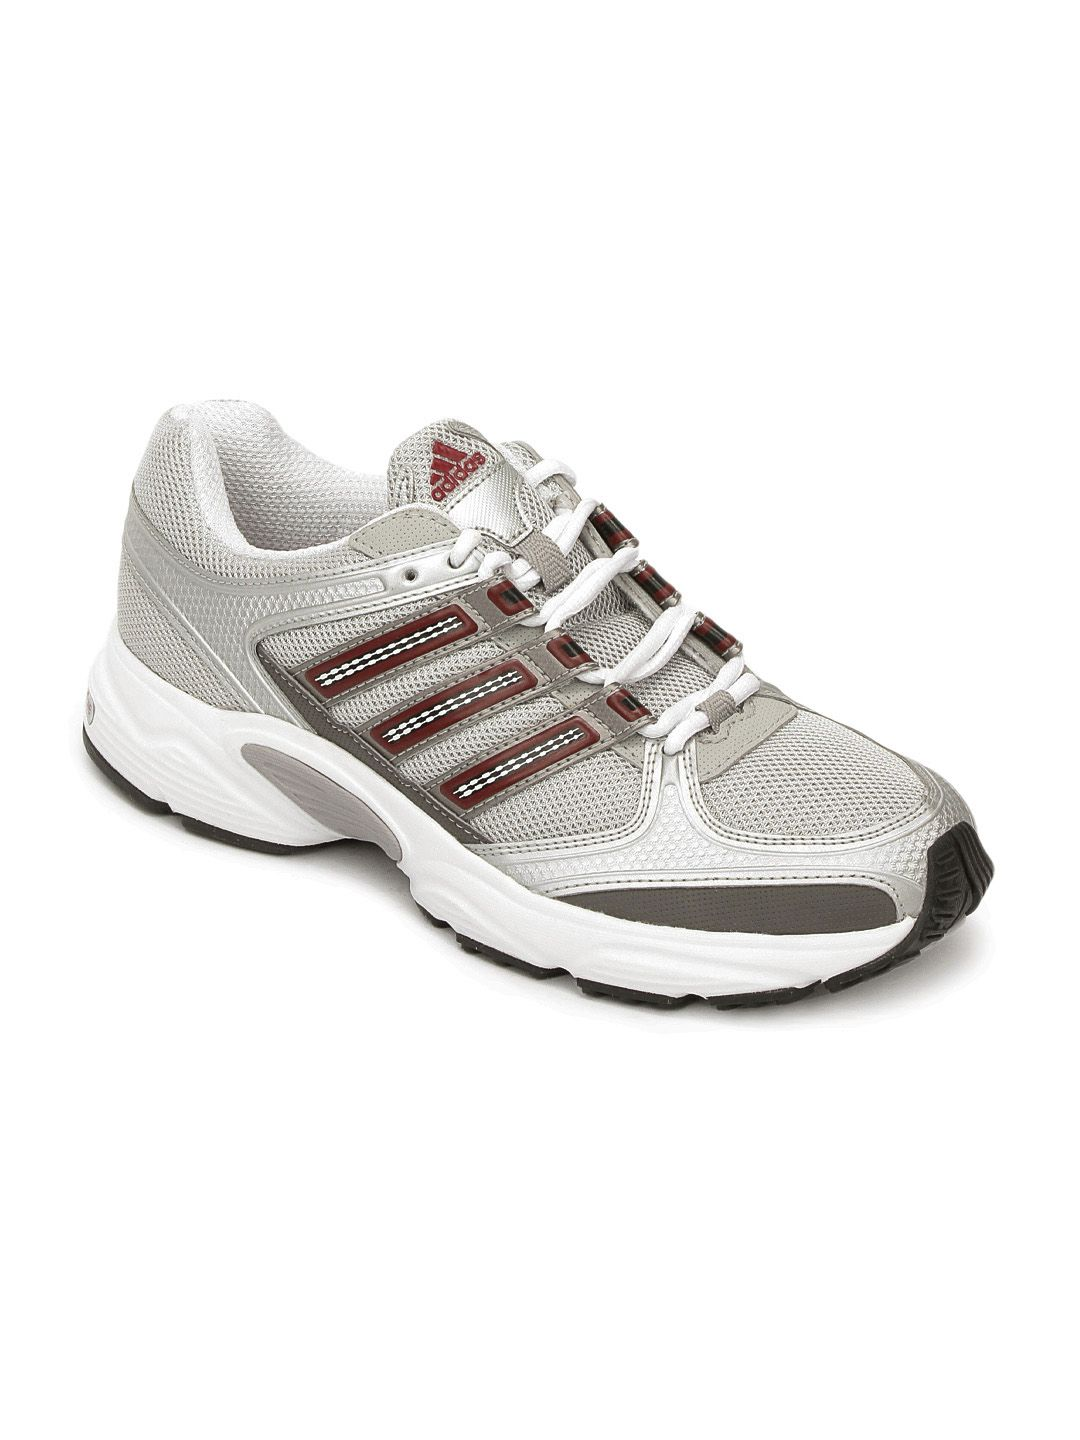

Product Title:  ADIDAS Men Silver Phaedra Shoes
Euclidean Distance from input image: 29.374044


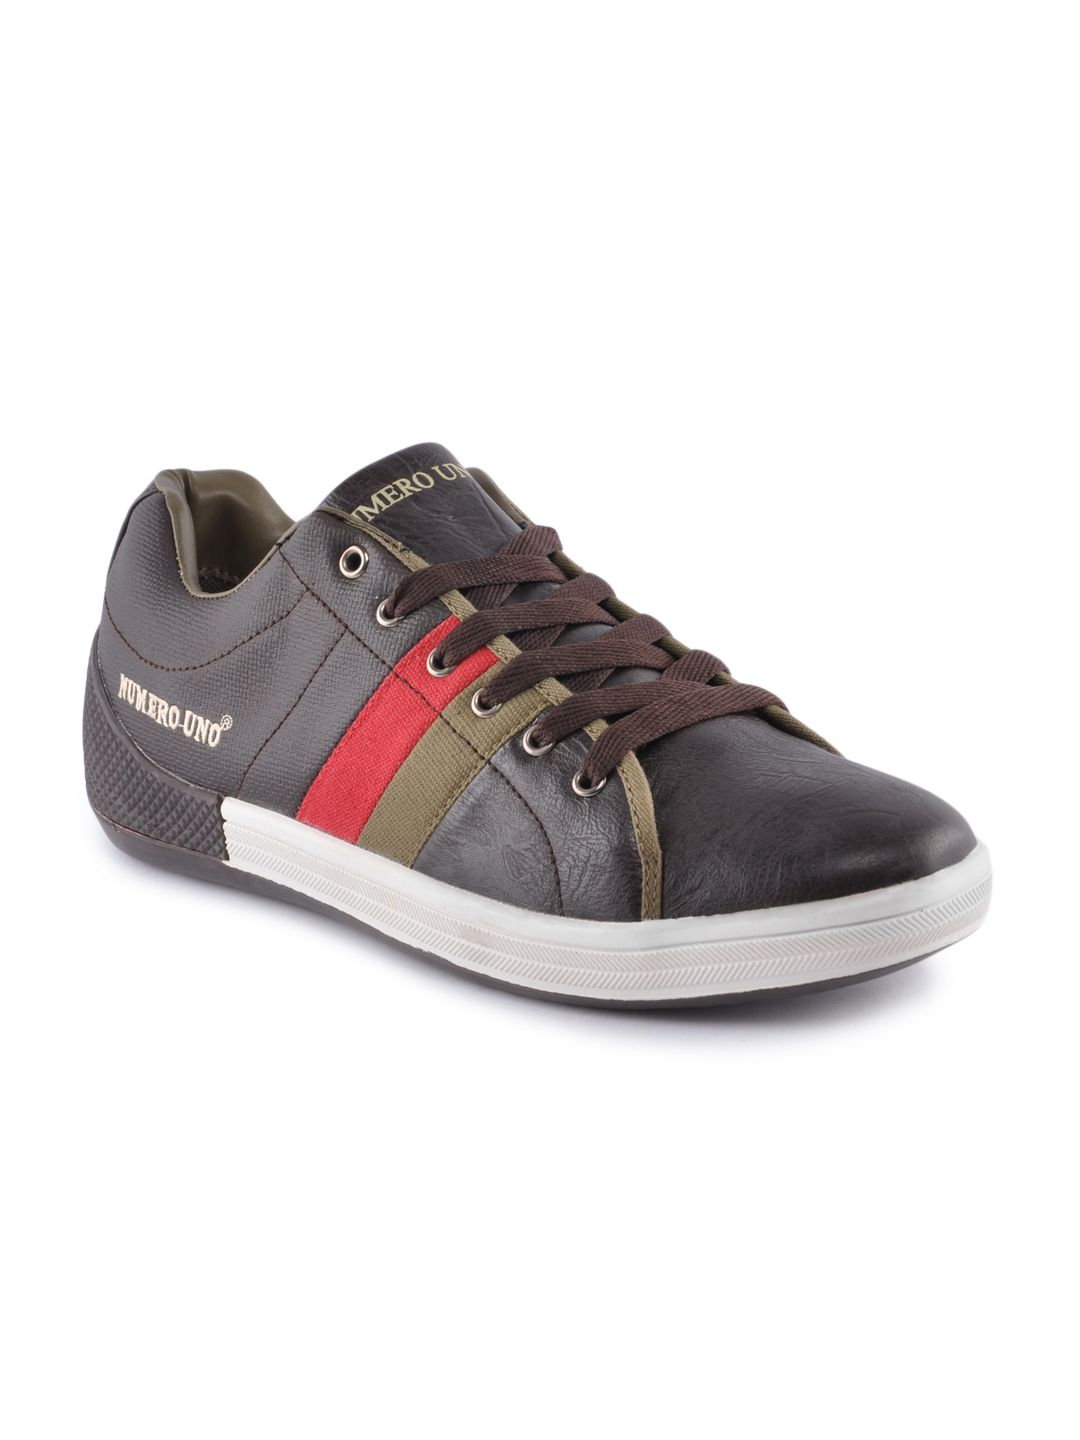

Product Title:  Numero Uno Men Brown Casual Shoes
Euclidean Distance from input image: 30.170906


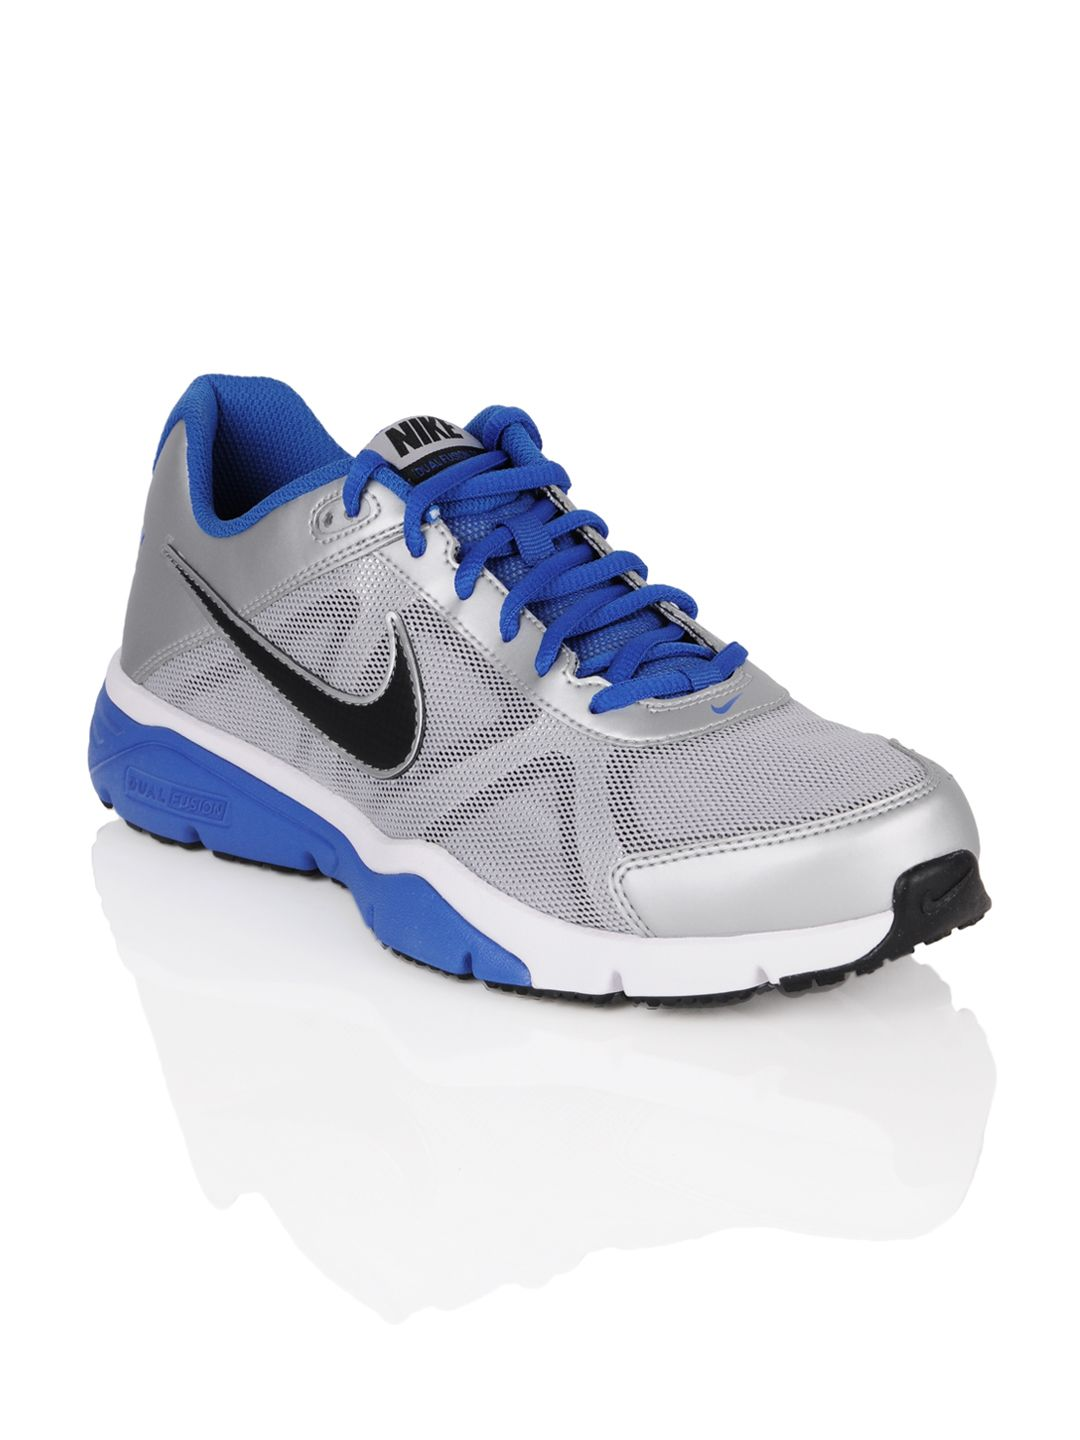

Product Title:  Nike Men Dual Fusion TR III Grey Sports Shoes
Euclidean Distance from input image: 30.894918


In [13]:
from sklearn.metrics import pairwise_distances
from IPython.display import Image, display

def get_similar_products_cnn(product_id, num_results):
    doc_id = Productids.index(product_id)

    pairwise_dist = pairwise_distances(extracted_features, extracted_features[doc_id].reshape(1,-1))

    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]
    print("="*20, "input product image", "="*20)
    ip_row = men[['ImageURL','ProductTitle']].loc[men['ProductId']==int(Productids[indices[0]])]
    for indx, row in ip_row.iterrows():
        display(Image(url=row['ImageURL'], width = 224, height = 224, embed=True))
        print('Product Title: ', row['ProductTitle'])

    print("\n","="*20, "Recommended products", "="*20)
    for i in range(1, len(indices)):
        rows = men[['ImageURL','ProductTitle']].loc[men['ProductId']==int(Productids[indices[i]])]
        for indx, row in rows.iterrows():
            display(Image(url=row['ImageURL'], width = 224, height = 224, embed=True))
            print('Product Title: ', row['ProductTitle'])
            print('Euclidean Distance from input image:', pdists[i])

get_similar_products_cnn('13683', 5)


In [14]:
img_width, img_height = 224, 224

train_data_dir = "C:\\Users\\ACER\\Downloads\\product recommander\\data\\Footwear\\Women\\Images"

nb_train_samples = 759

batch_size = 1

def extract_features():
    Itemcodes = []  
    
    datagen = ImageDataGenerator(rescale=1. / 255)

    model = applications.ResNet50(include_top=False, weights='imagenet', input_shape=(img_width, img_height, 3))

    generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,  
        shuffle=False     
    )
    
    for filename in generator.filenames:
        item_code = filename.split(os.sep)[-1].split('.')[0] 
        Itemcodes.append(item_code)

    all_features = []  

    for i in range(nb_train_samples // batch_size):
        batch_images = next(generator)  
        
        features = model.predict(batch_images, batch_size=batch_size)
        
        all_features.append(features.flatten())

    all_features = np.array(all_features)

    np.save(open('./Women_ResNet_features.npy', 'wb'), all_features)
    np.save(open('./Women_ResNet_feature_product_ids.npy', 'wb'), np.array(Itemcodes))

start_time = datetime.now()

extract_features()

print("Time taken in feature extraction:", datetime.now() - start_time)


Found 769 images belonging to 1 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

In [15]:
img_width, img_height = 224, 224

train_data_dir = r"C:\\Users\\ACER\\Downloads\\product recommander\\data\\Apparel\\Boys\\Images"

nb_train_samples = 759

batch_size = 1

def extract_features():
    Itemcodes = []  
    
    datagen = ImageDataGenerator(rescale=1. / 255)

    model = applications.ResNet50(include_top=False, weights='imagenet', input_shape=(img_width, img_height, 3))

    generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None, 
        shuffle=False     
    )
    
    for filename in generator.filenames:
        item_code = filename.split(os.sep)[-1].split('.')[0]  
        Itemcodes.append(item_code)

    all_features = []  
    for i in range(nb_train_samples // batch_size):
        batch_images = next(generator)  
        
        features = model.predict(batch_images, batch_size=batch_size)
        
        all_features.append(features.flatten())

    all_features = np.array(all_features)

    np.save(open('./Boys_ResNet_features.npy', 'wb'), all_features) 
    np.save(open('./Boys_ResNet_feature_product_ids.npy', 'wb'), np.array(Itemcodes))  

start_time = datetime.now()

extract_features()

print("Time taken in feature extraction:", datetime.now() - start_time)


Found 759 images belonging to 1 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

In [16]:
img_width, img_height = 224, 224

train_data_dir = "C:\\Users\\ACER\\Downloads\\product recommander\\data\\Apparel\\Girls\\Images"

nb_train_samples = 759

batch_size = 1

def extract_features():
    Itemcodes = []  
    
    datagen = ImageDataGenerator(rescale=1. / 255)

    model = applications.ResNet50(include_top=False, weights='imagenet', input_shape=(img_width, img_height, 3))

    generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,  
        shuffle=False    
    )
    
    for filename in generator.filenames:
        item_code = filename.split(os.sep)[-1].split('.')[0]  
        Itemcodes.append(item_code)

    all_features = []  

    for i in range(nb_train_samples // batch_size):
        batch_images = next(generator)  
        
        features = model.predict(batch_images, batch_size=batch_size)
        
        all_features.append(features.flatten())

    all_features = np.array(all_features)

    np.save(open('./Girls_ResNet_features.npy', 'wb'), all_features)
    np.save(open('./Girls_ResNet_feature_product_ids.npy', 'wb'), np.array(Itemcodes))

start_time = datetime.now()

extract_features()

print("Time taken in feature extraction:", datetime.now() - start_time)


Found 567 images belonging to 1 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

In [17]:
boys_extracted_features = np.load(r'C:\\Users\\ACER\\Documents\\ml prjt\\Fashion Recommendation\\Boys_ResNet_features.npy')
boys_Productids = np.load(r'C:\\Users\\ACER\\Documents\\ml prjt\\Fashion Recommendation\Boys_ResNet_feature_product_ids.npy')

girls_extracted_features = np.load(r'C:\\Users\\ACER\\Documents\\ml prjt\\Fashion Recommendation\\Girls_ResNet_features.npy')
girls_Productids = np.load(r'C:\\Users\\ACER\\Documents\\ml prjt\\Fashion Recommendation\\Girls_ResNet_feature_product_ids.npy')

men_extracted_features = np.load(r'C:\Users\ACER\Documents\ml prjt\Fashion Recommendation\Men_ResNet_features.npy')
men_Productids = np.load(r'C:\Users\ACER\Documents\ml prjt\Fashion Recommendation\Men_ResNet_feature_product_ids.npy')

women_extracted_features = np.load(r'C:\\Users\\ACER\\Documents\\ml prjt\\Fashion Recommendation\\Women_ResNet_features.npy')
women_Productids = np.load(r'C:\\Users\ACER\\Documents\\ml prjt\\Fashion Recommendation\\Women_ResNet_feature_product_ids.npy')

fashion_df["ProductId"] = fashion_df["ProductId"].astype(str)

In [18]:
def get_similar_products_cnn(product_id, num_results):
    gender_category = fashion_df[fashion_df['ProductId'] == product_id]['Gender'].values[0]

    if gender_category == "Boys":
        extracted_features = boys_extracted_features
        Productids = boys_Productids
    elif gender_category == "Girls":
        extracted_features = girls_extracted_features
        Productids = girls_Productids
    elif gender_category == "Men":
        extracted_features = men_extracted_features
        Productids = men_Productids
    elif gender_category == "Women":
        extracted_features = women_extracted_features
        Productids = women_Productids

    Productids = list(Productids)

    doc_id = Productids.index(product_id)

    pairwise_dist = pairwise_distances(extracted_features, extracted_features[doc_id].reshape(1,-1))

    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    print("="*20, "input product details", "="*20)
    ip_row = fashion_df[['ImageURL','ProductTitle']].loc[fashion_df['ProductId']==Productids[indices[0]]]
    for indx, row in ip_row.iterrows():
        display(Image(url=row['ImageURL'], width = 224, height = 224, embed=True))
        print('Product Title: ', row['ProductTitle'])

    print("\n","="*20, "Recommended products", "="*20)
    for i in range(1,len(indices)):
        rows = fashion_df[['ImageURL','ProductTitle']].loc[fashion_df['ProductId']==Productids[indices[i]]]
        for indx, row in rows.iterrows():
            display(Image(url=row['ImageURL'], width = 224, height = 224, embed=True))
            print('Product Title: ', row['ProductTitle'])
            print('Euclidean Distance from input image:', pdists[i])

==================== input product details ====================


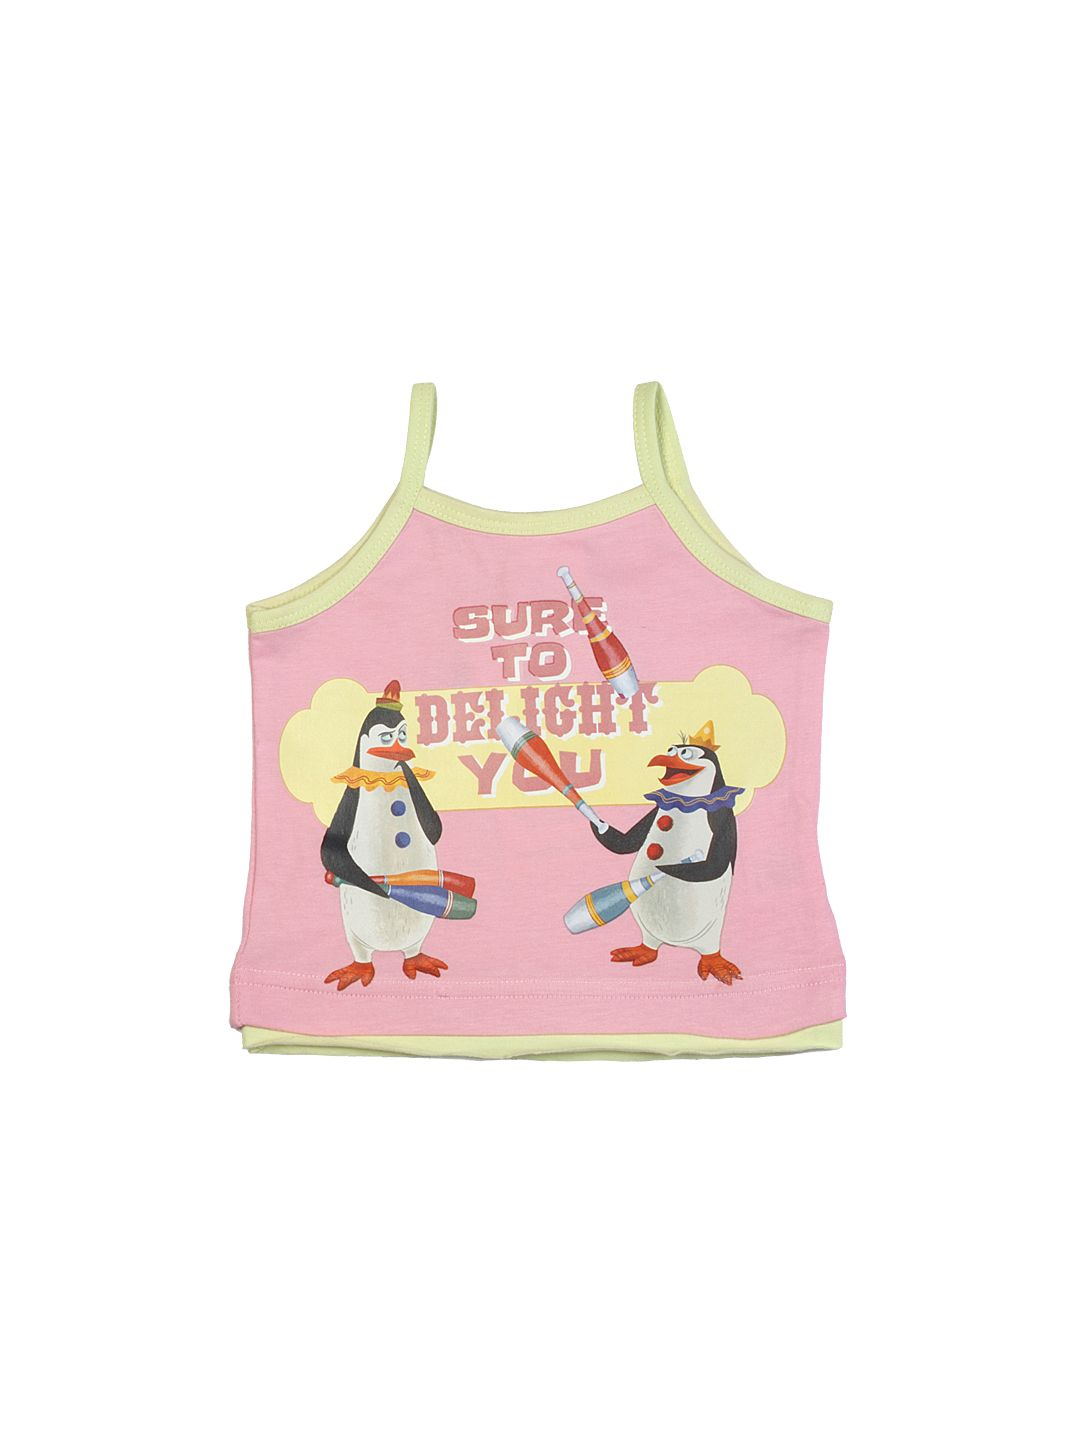

Product Title:  Madagascar3 Infant Girls Pink Spaghetti Top

 ==================== Recommended products ====================


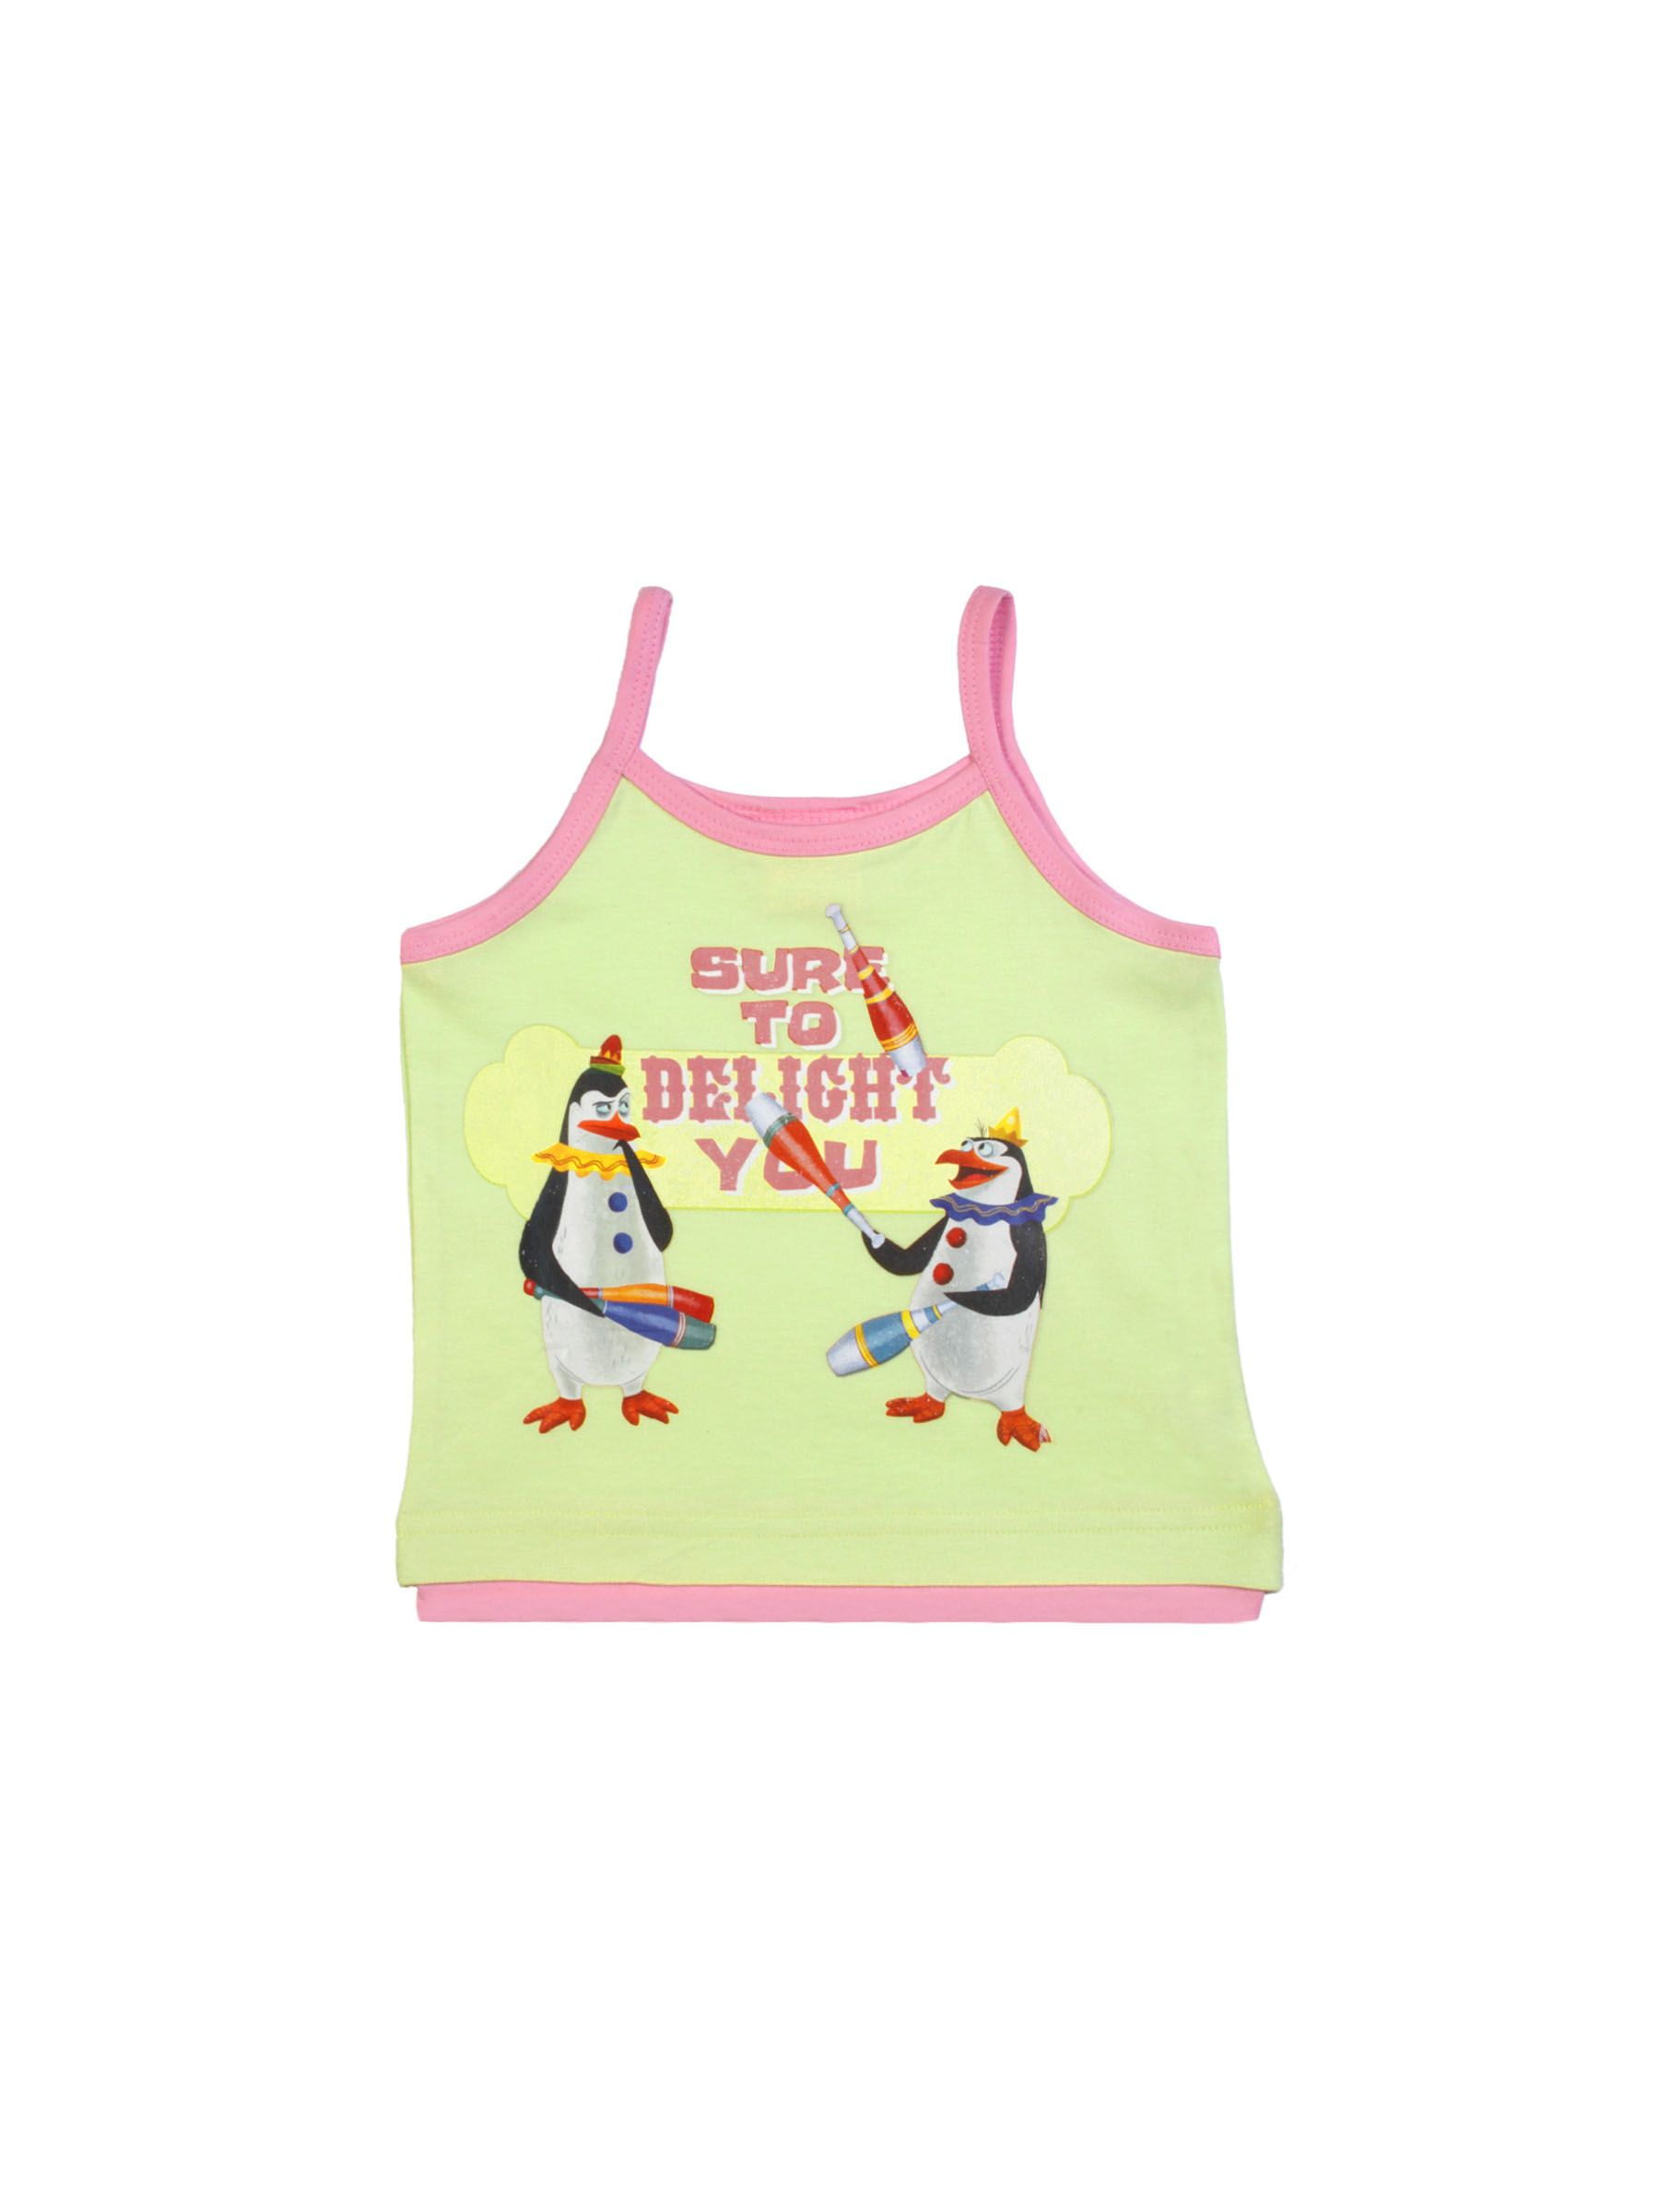

Product Title:  Madagascar3 Infant Girls Light Green Spaghetti Top
Euclidean Distance from input image: 12.884846


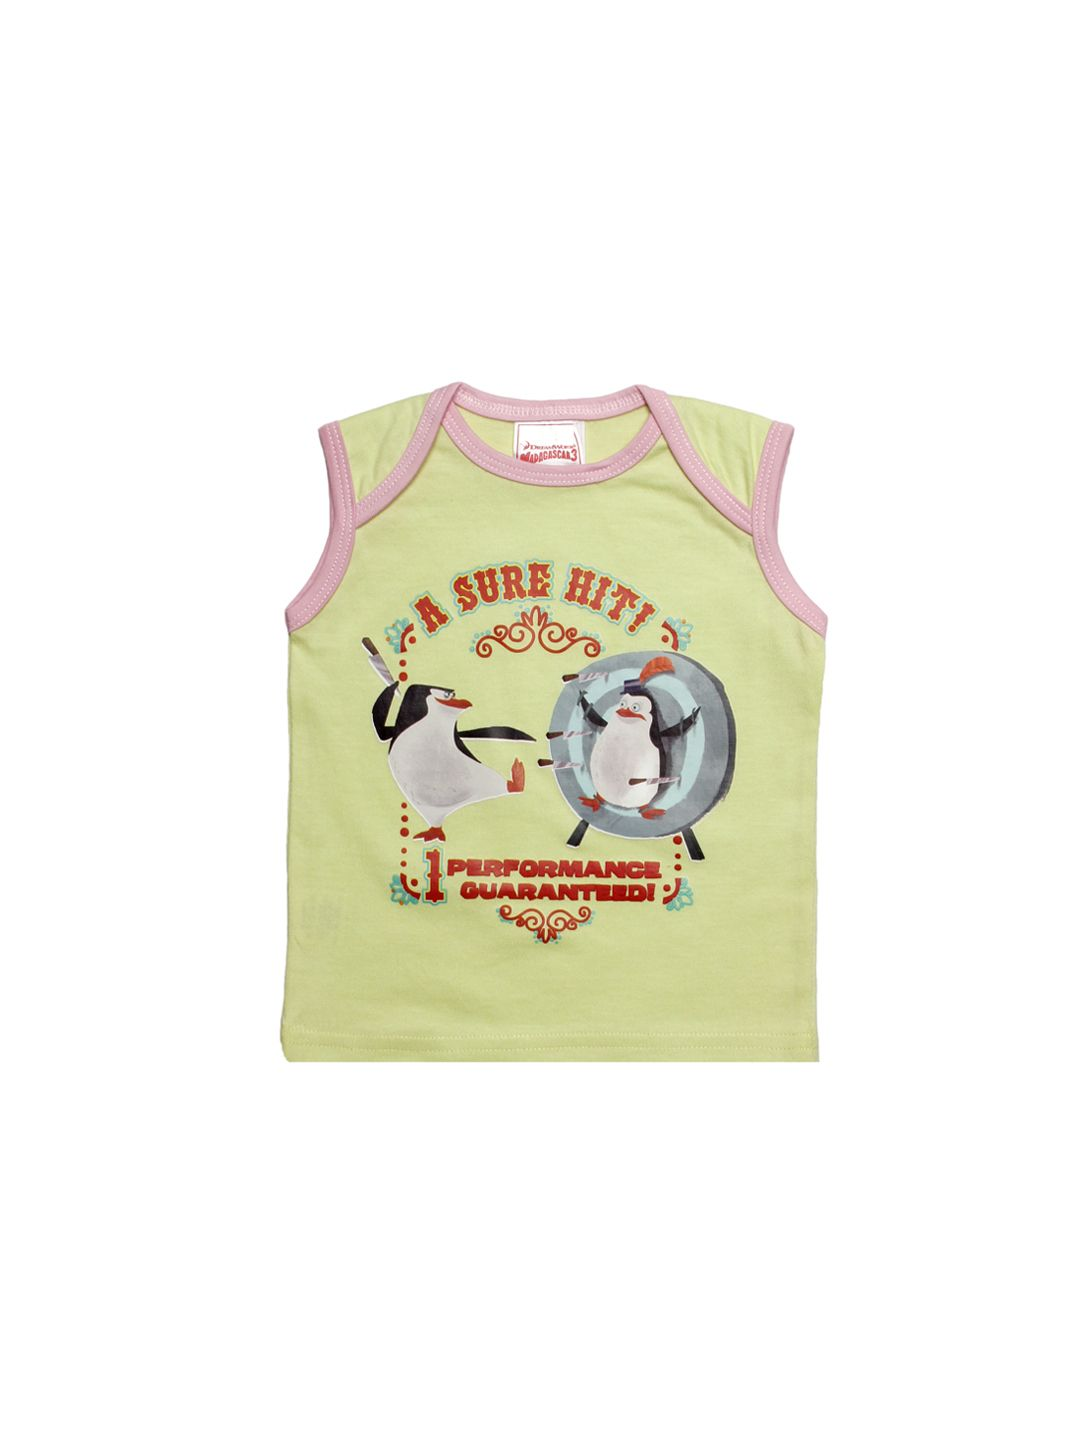

Product Title:  Madagascar3 Girls Green Innerwear Vest
Euclidean Distance from input image: 15.101387


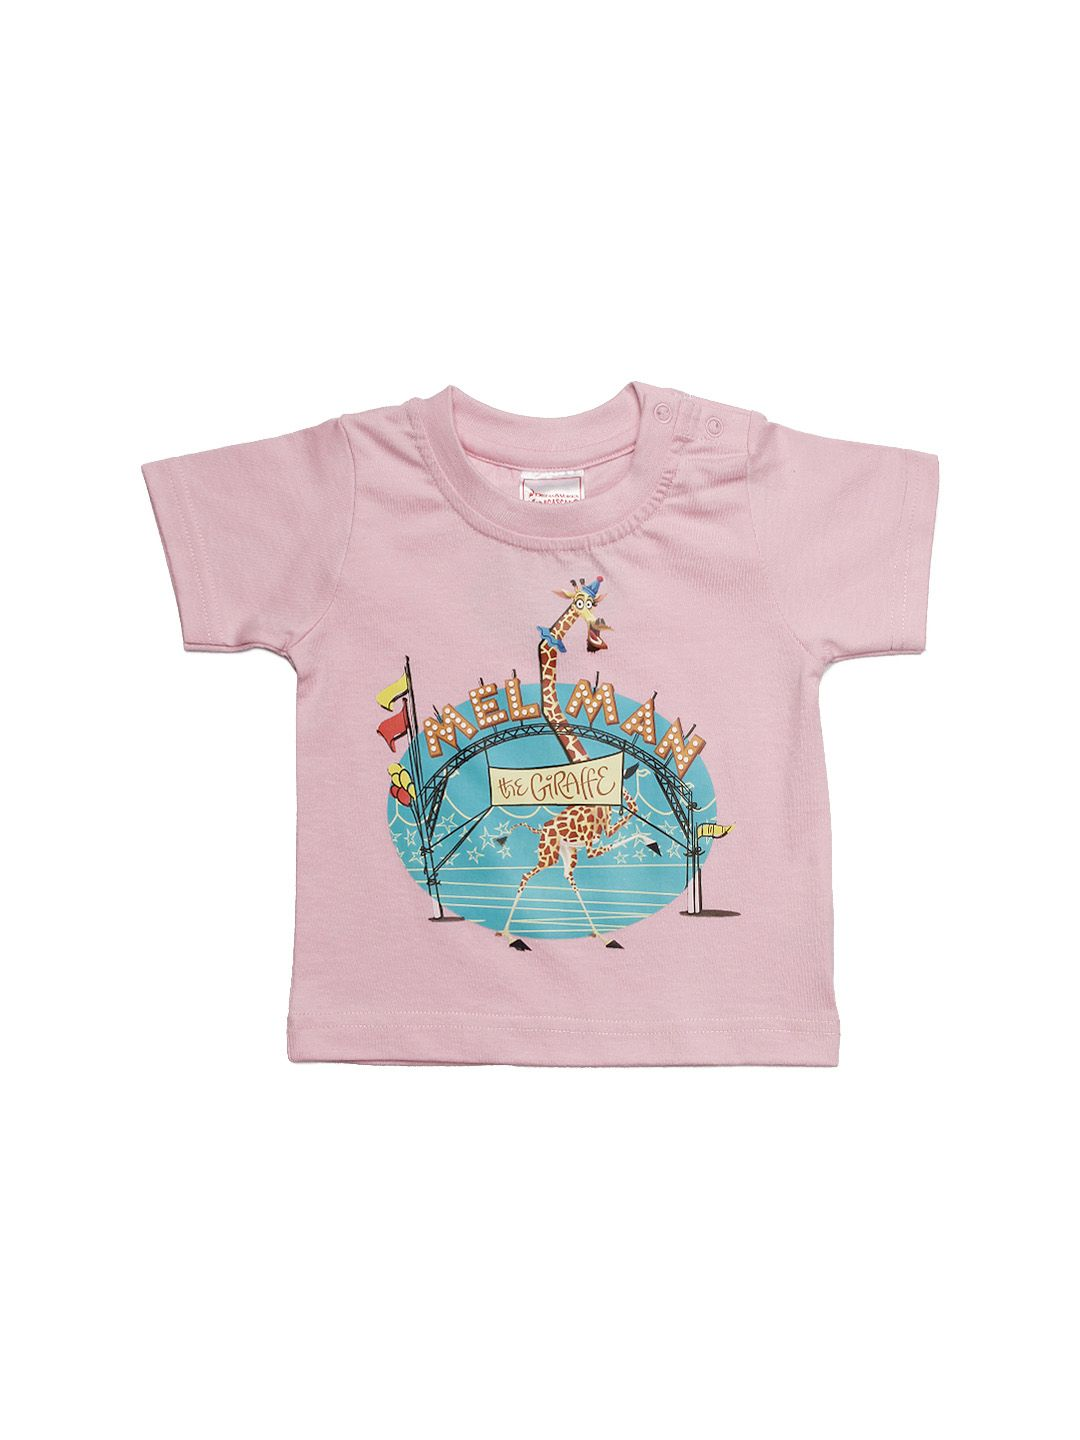

Product Title:  Madagascar3 Infant Girls Pink  T-Shirt
Euclidean Distance from input image: 15.660881


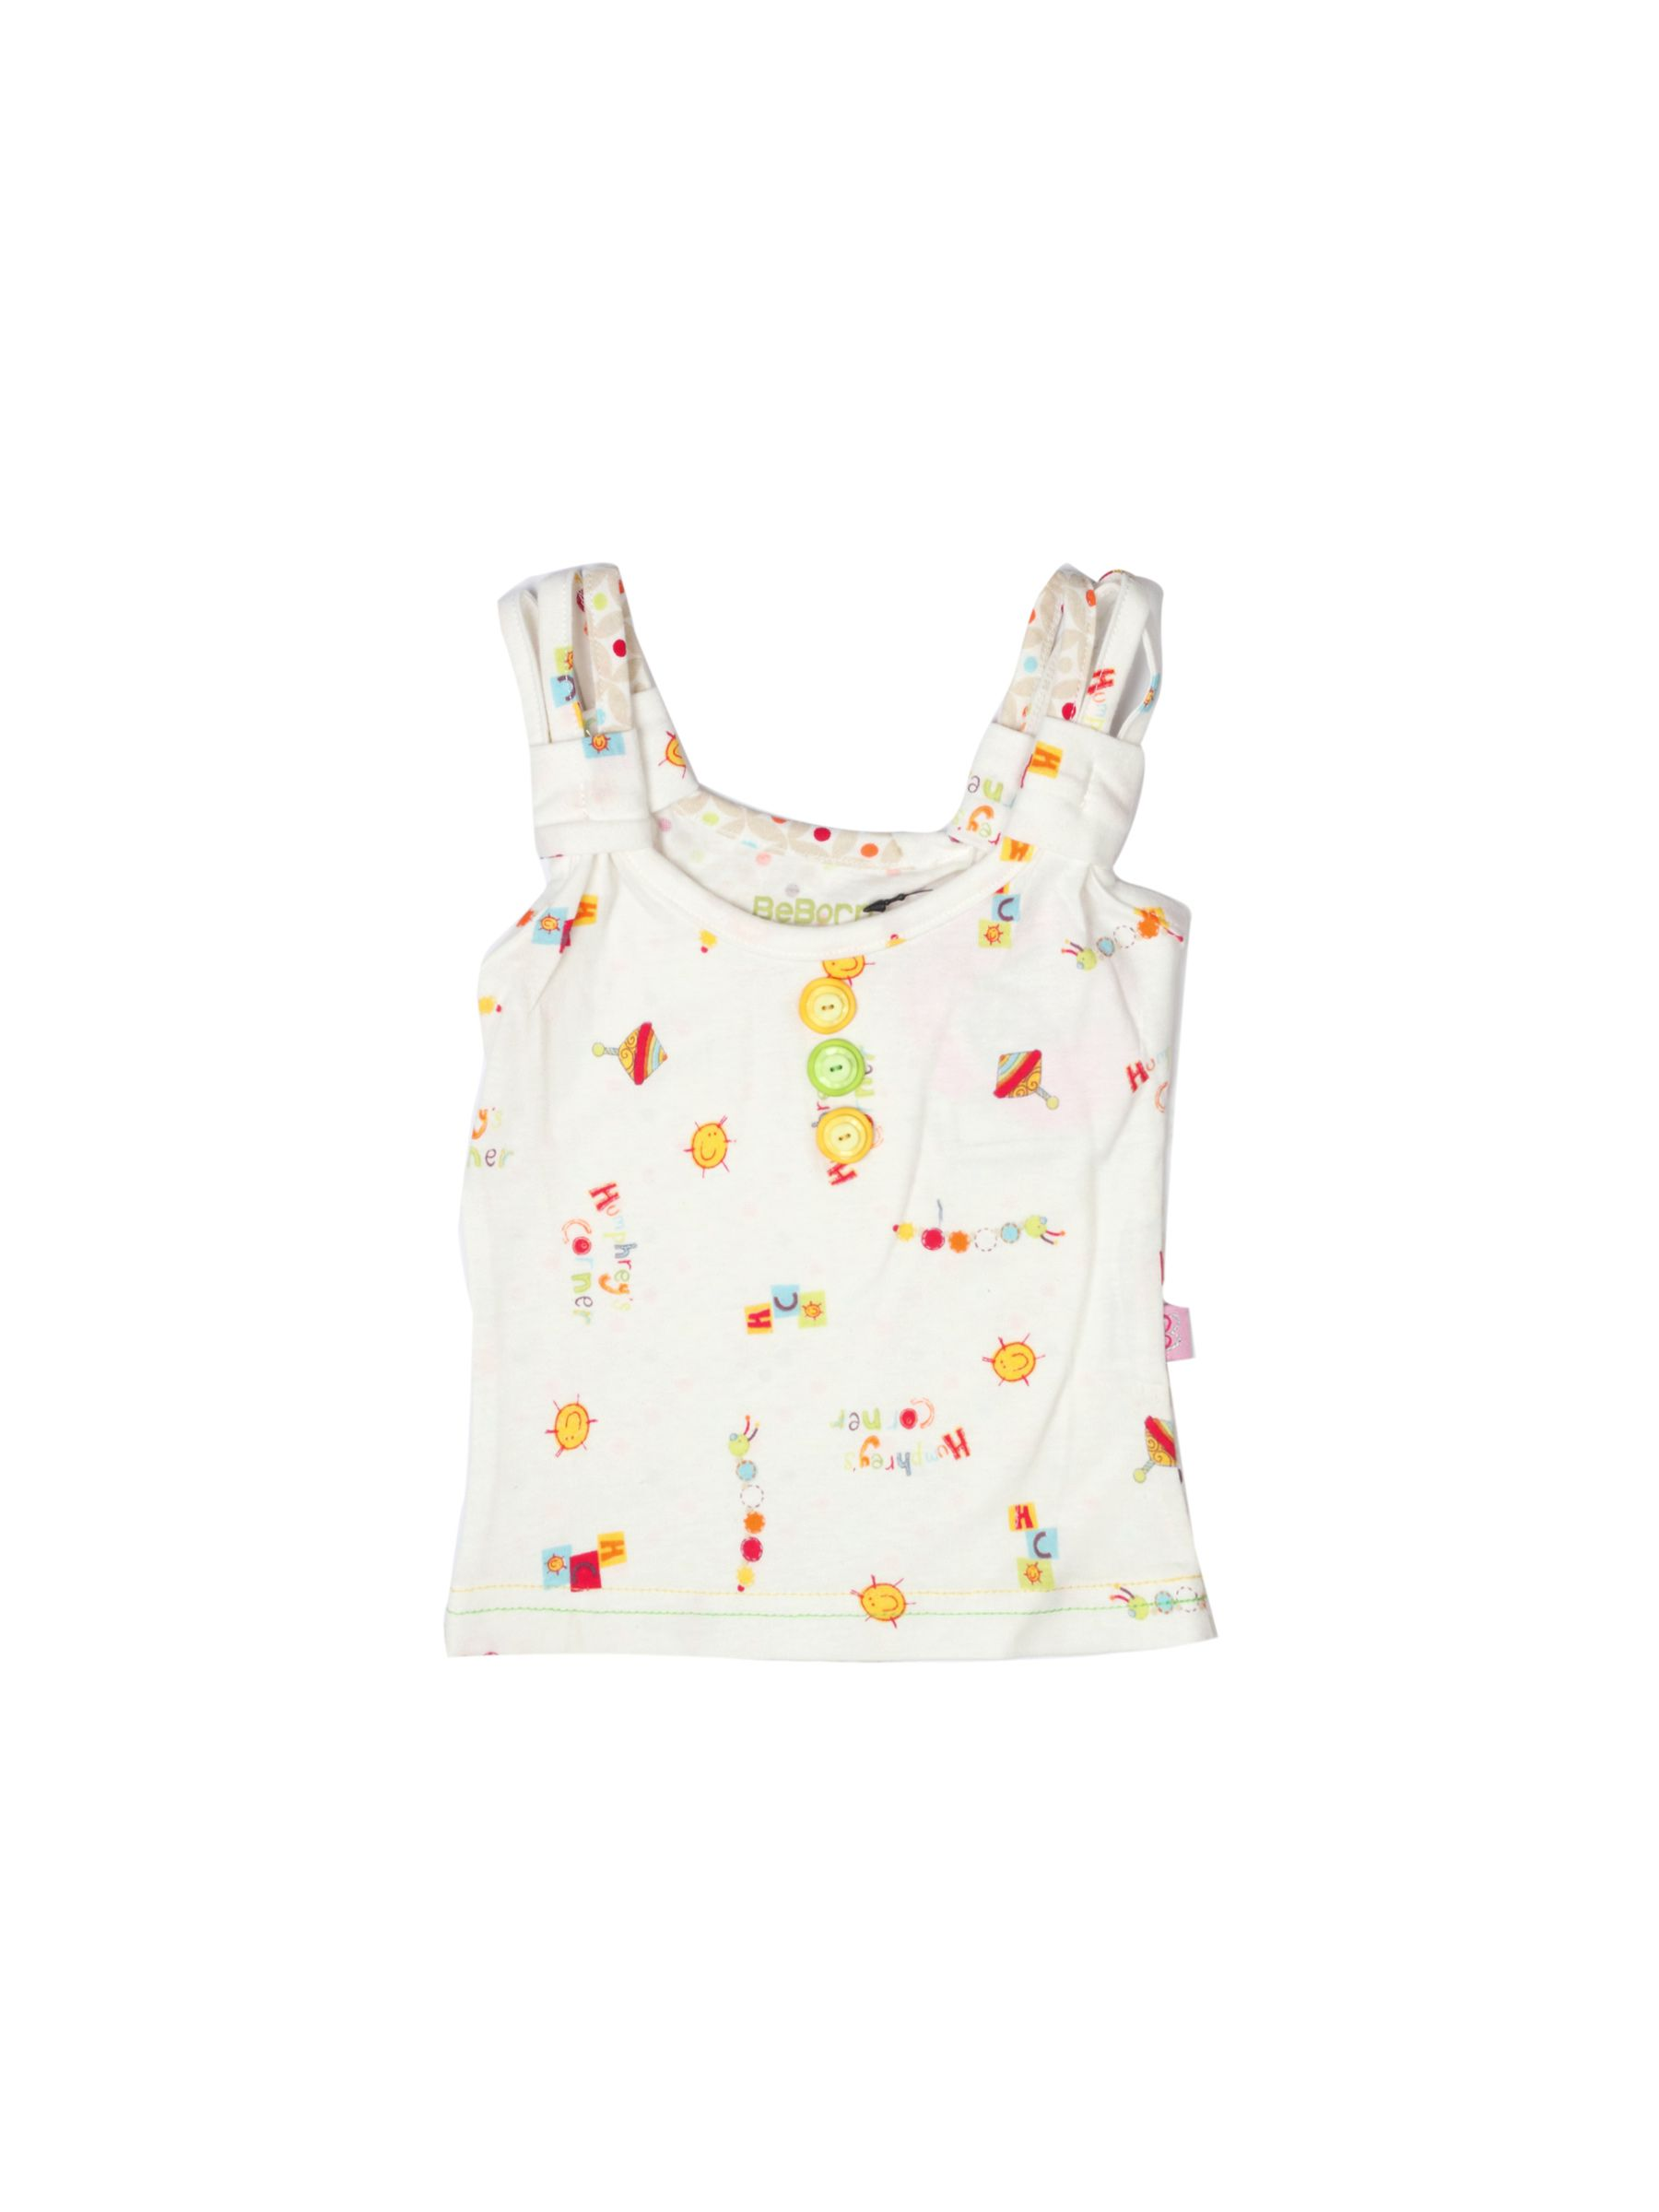

Product Title:  Doodle Girls Printed Off White Top
Euclidean Distance from input image: 15.706513


In [19]:
get_similar_products_cnn('37570', 5)

==================== input product details ====================


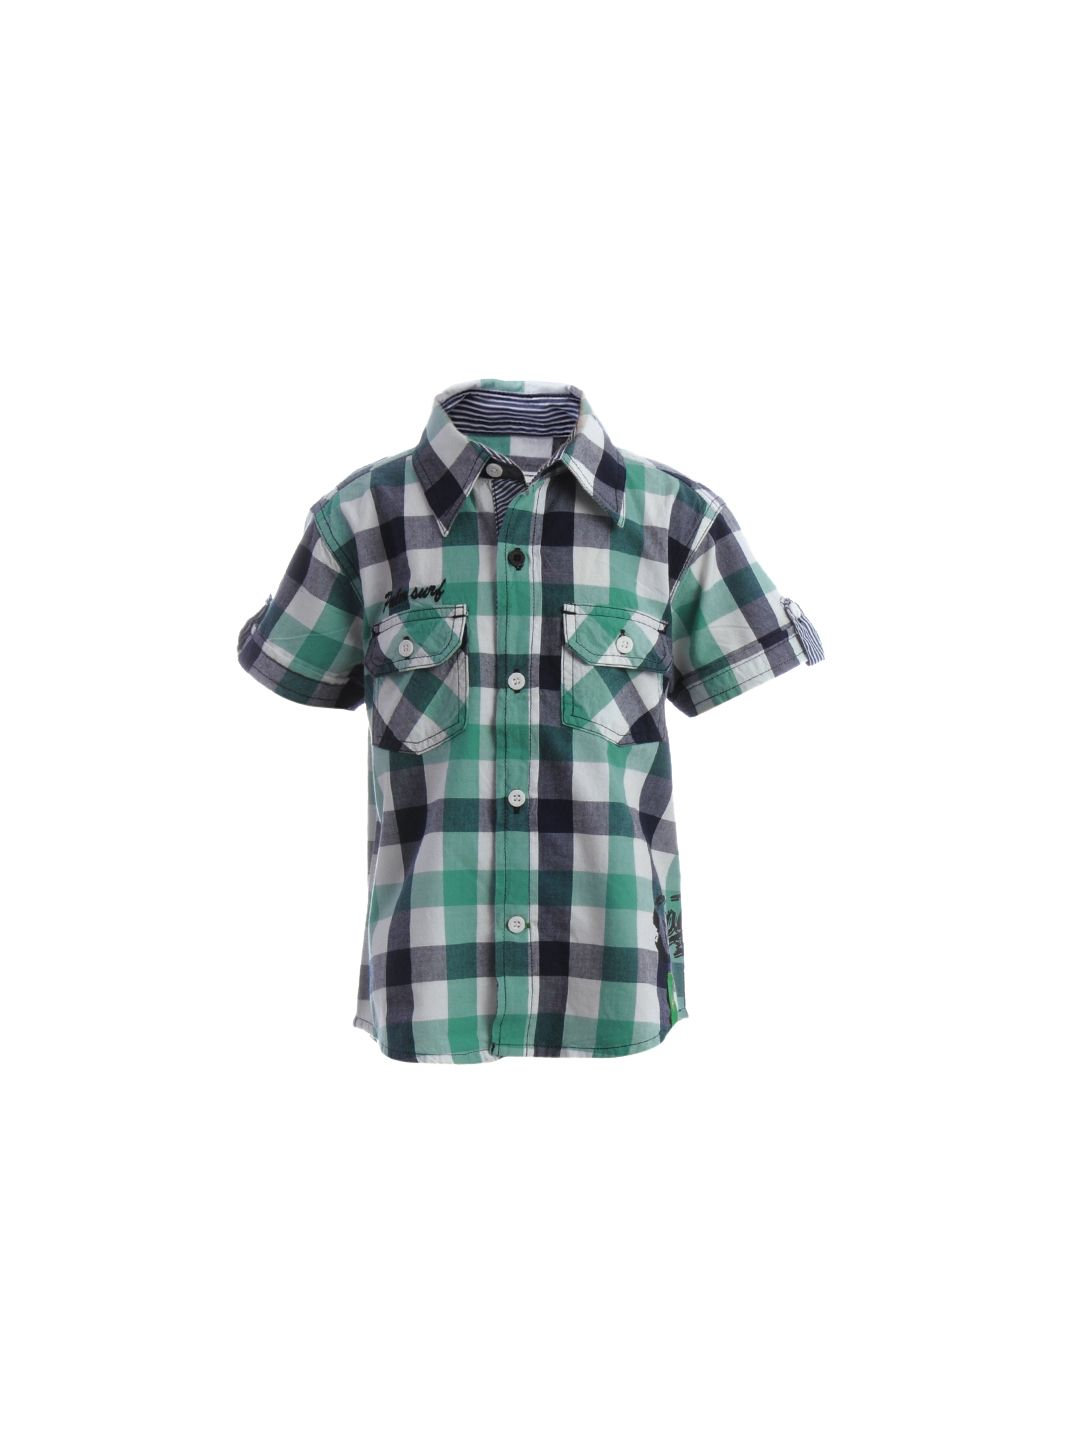

Product Title:  Palm Tree Boys Check Green Shirt

 ==================== Recommended products ====================


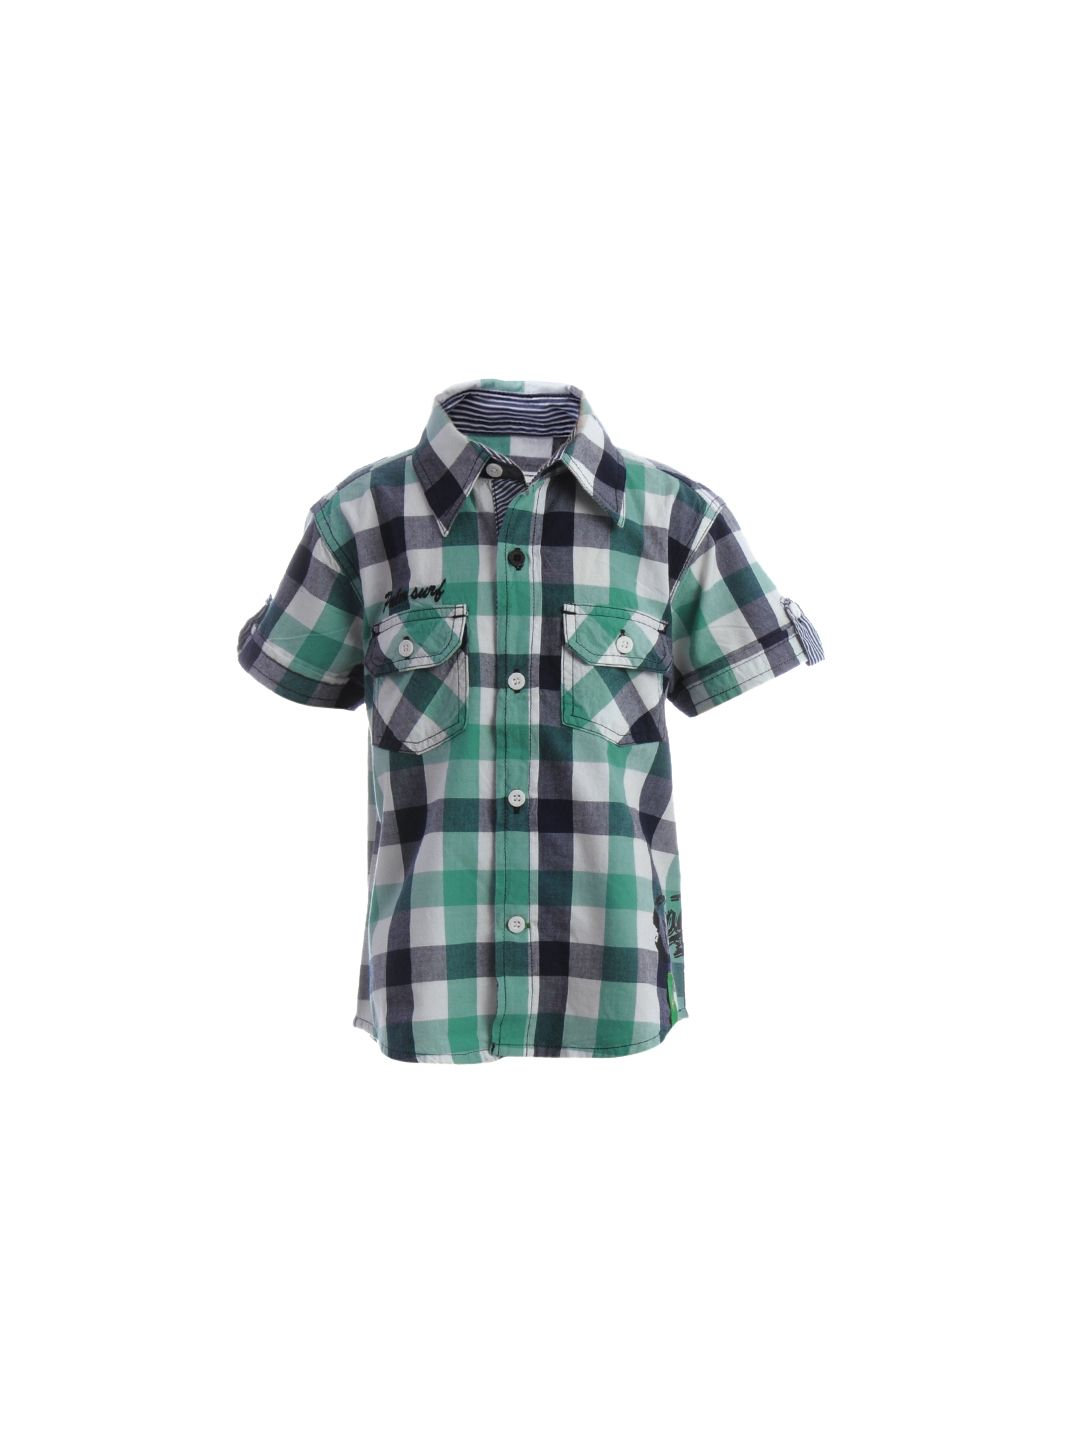

Product Title:  Gini and Jony Boys Check Green Shirt
Euclidean Distance from input image: 1.37540865e-05


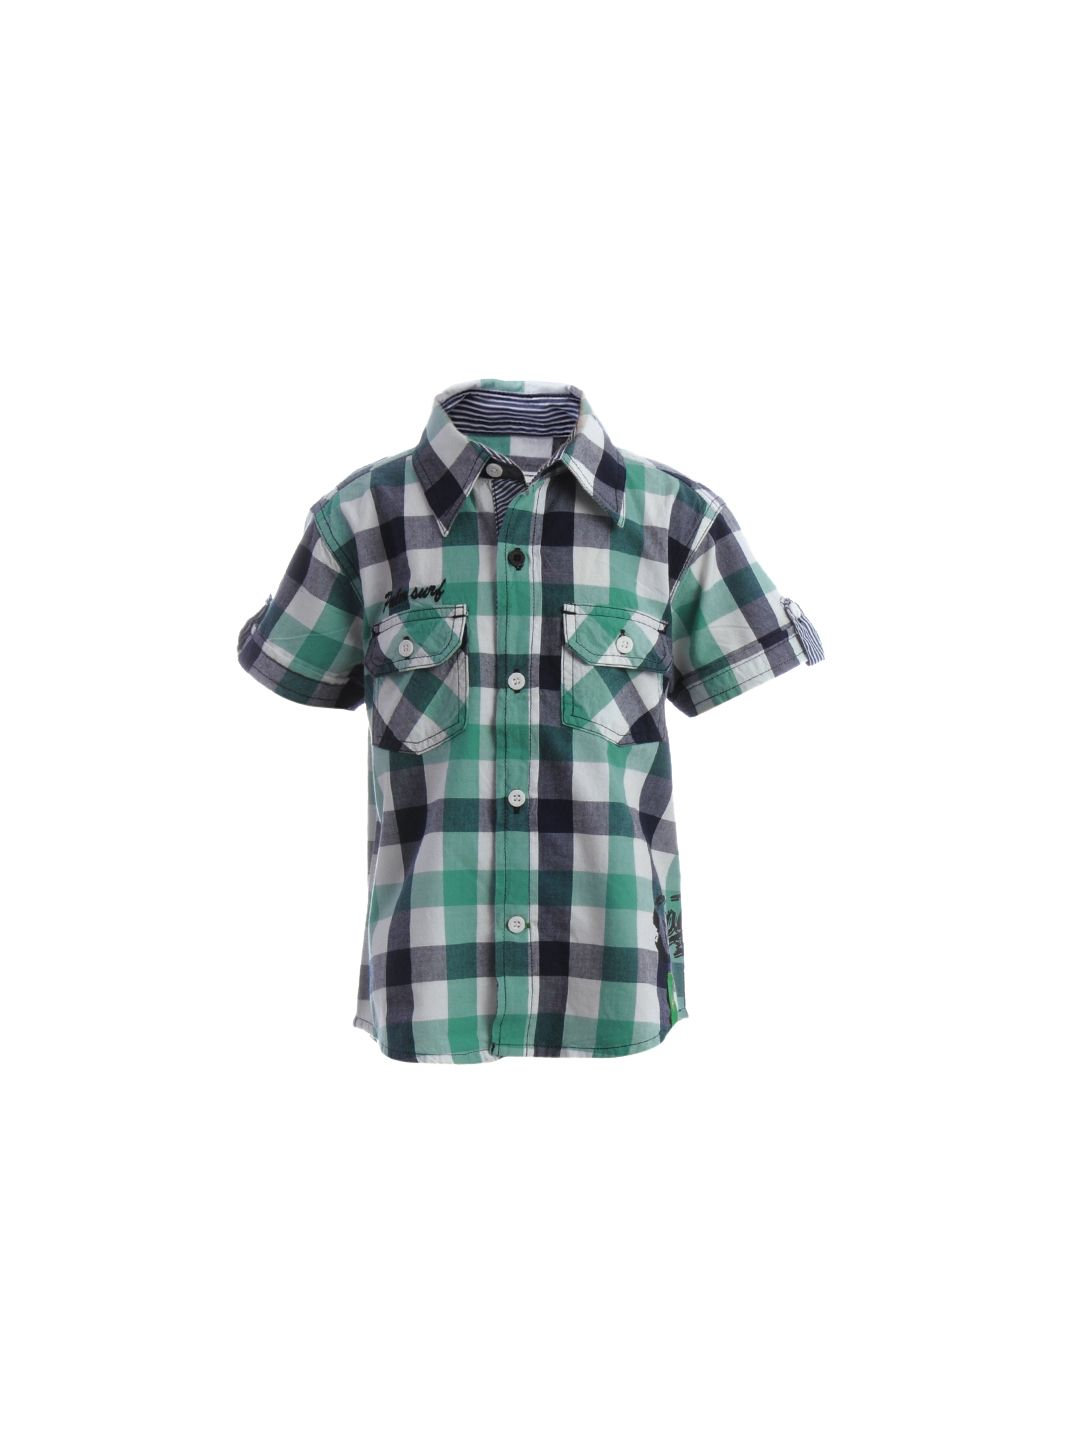

Product Title:  Palm Tree Boys Check Green Shirt
Euclidean Distance from input image: 0.53918684


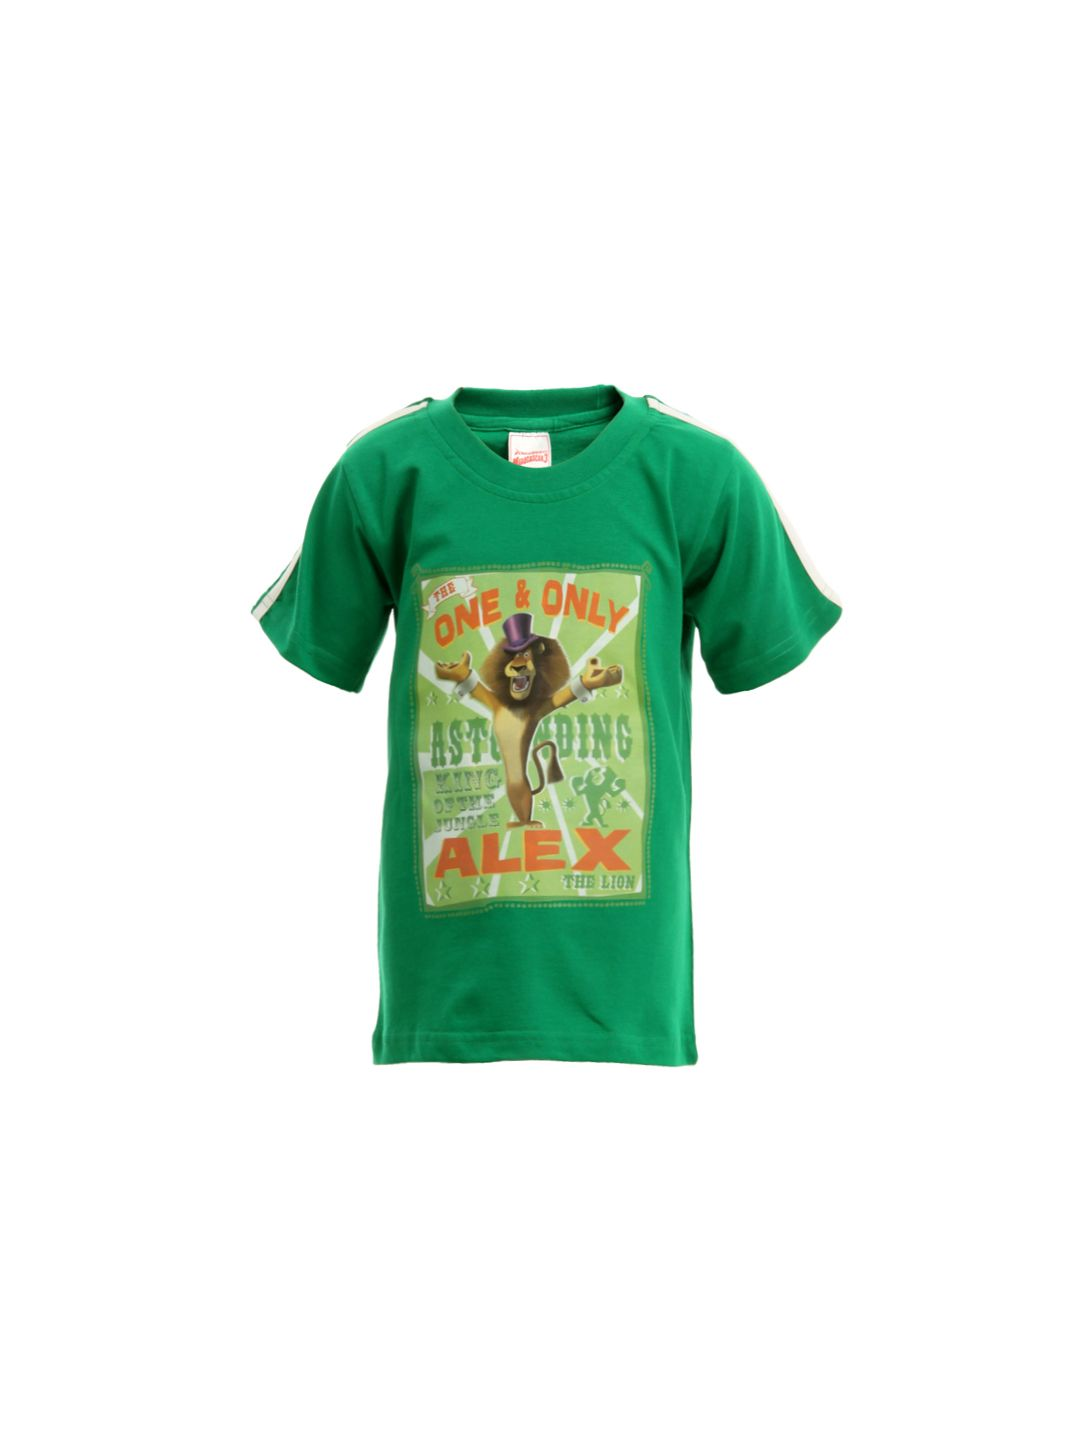

Product Title:  Madagascar 3 Boys Green Printed T-Shirt
Euclidean Distance from input image: 19.334682


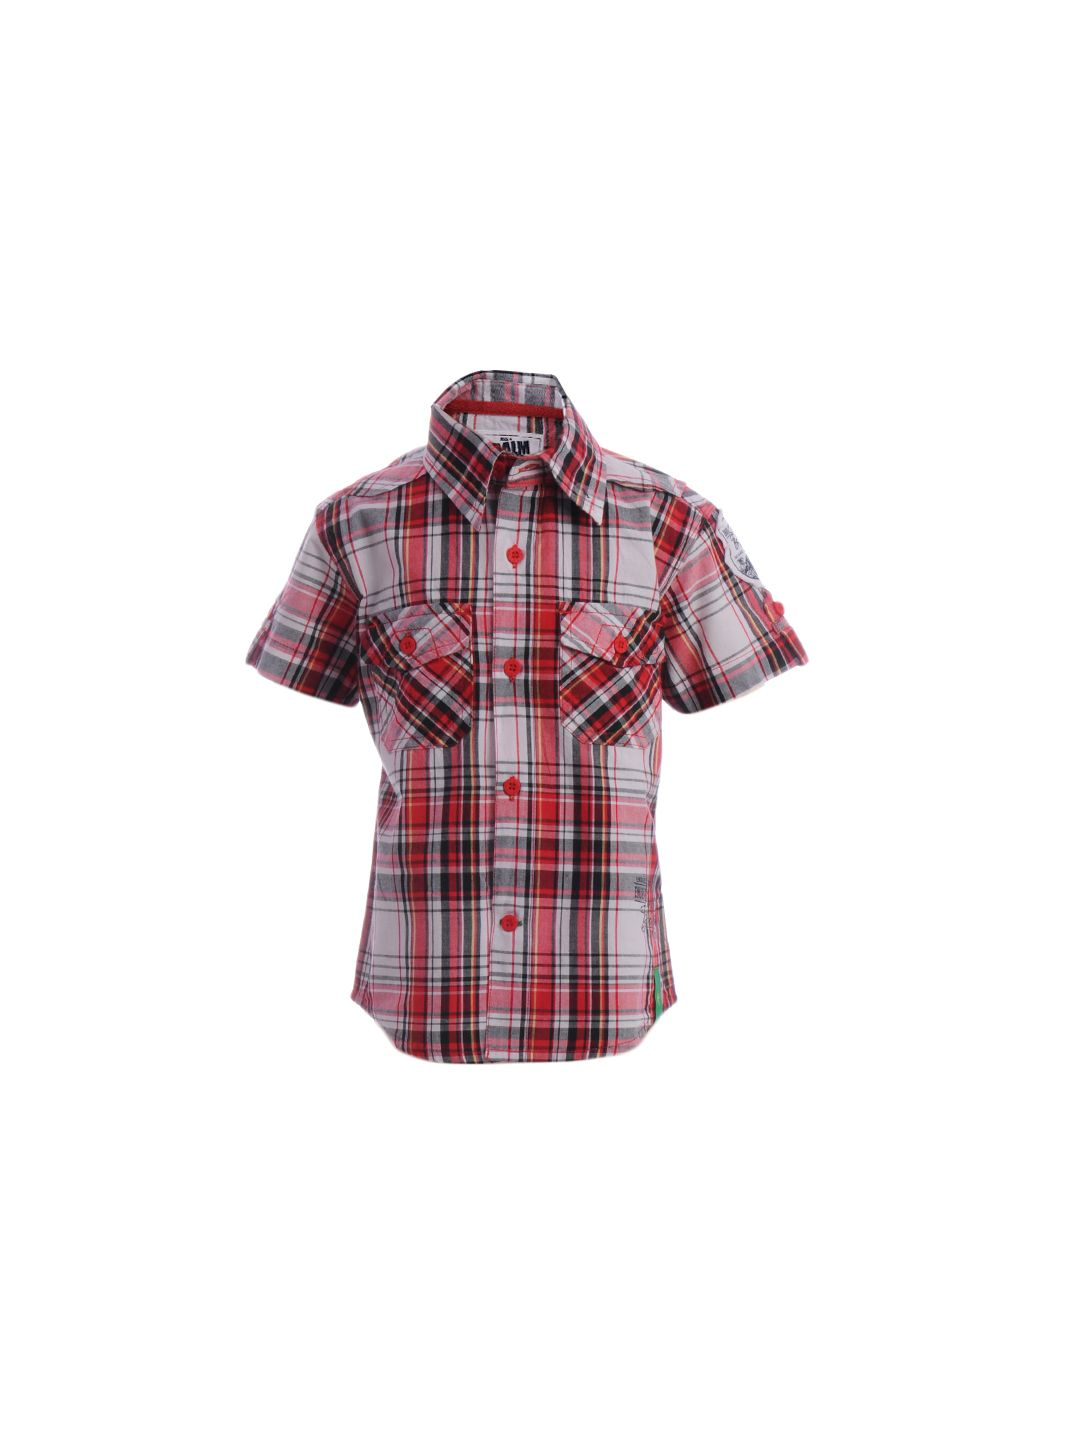

Product Title:  Gini and Jony Boys Check Red Shirt
Euclidean Distance from input image: 19.730627


In [20]:
get_similar_products_cnn('34033', 5)

==================== input product details ====================


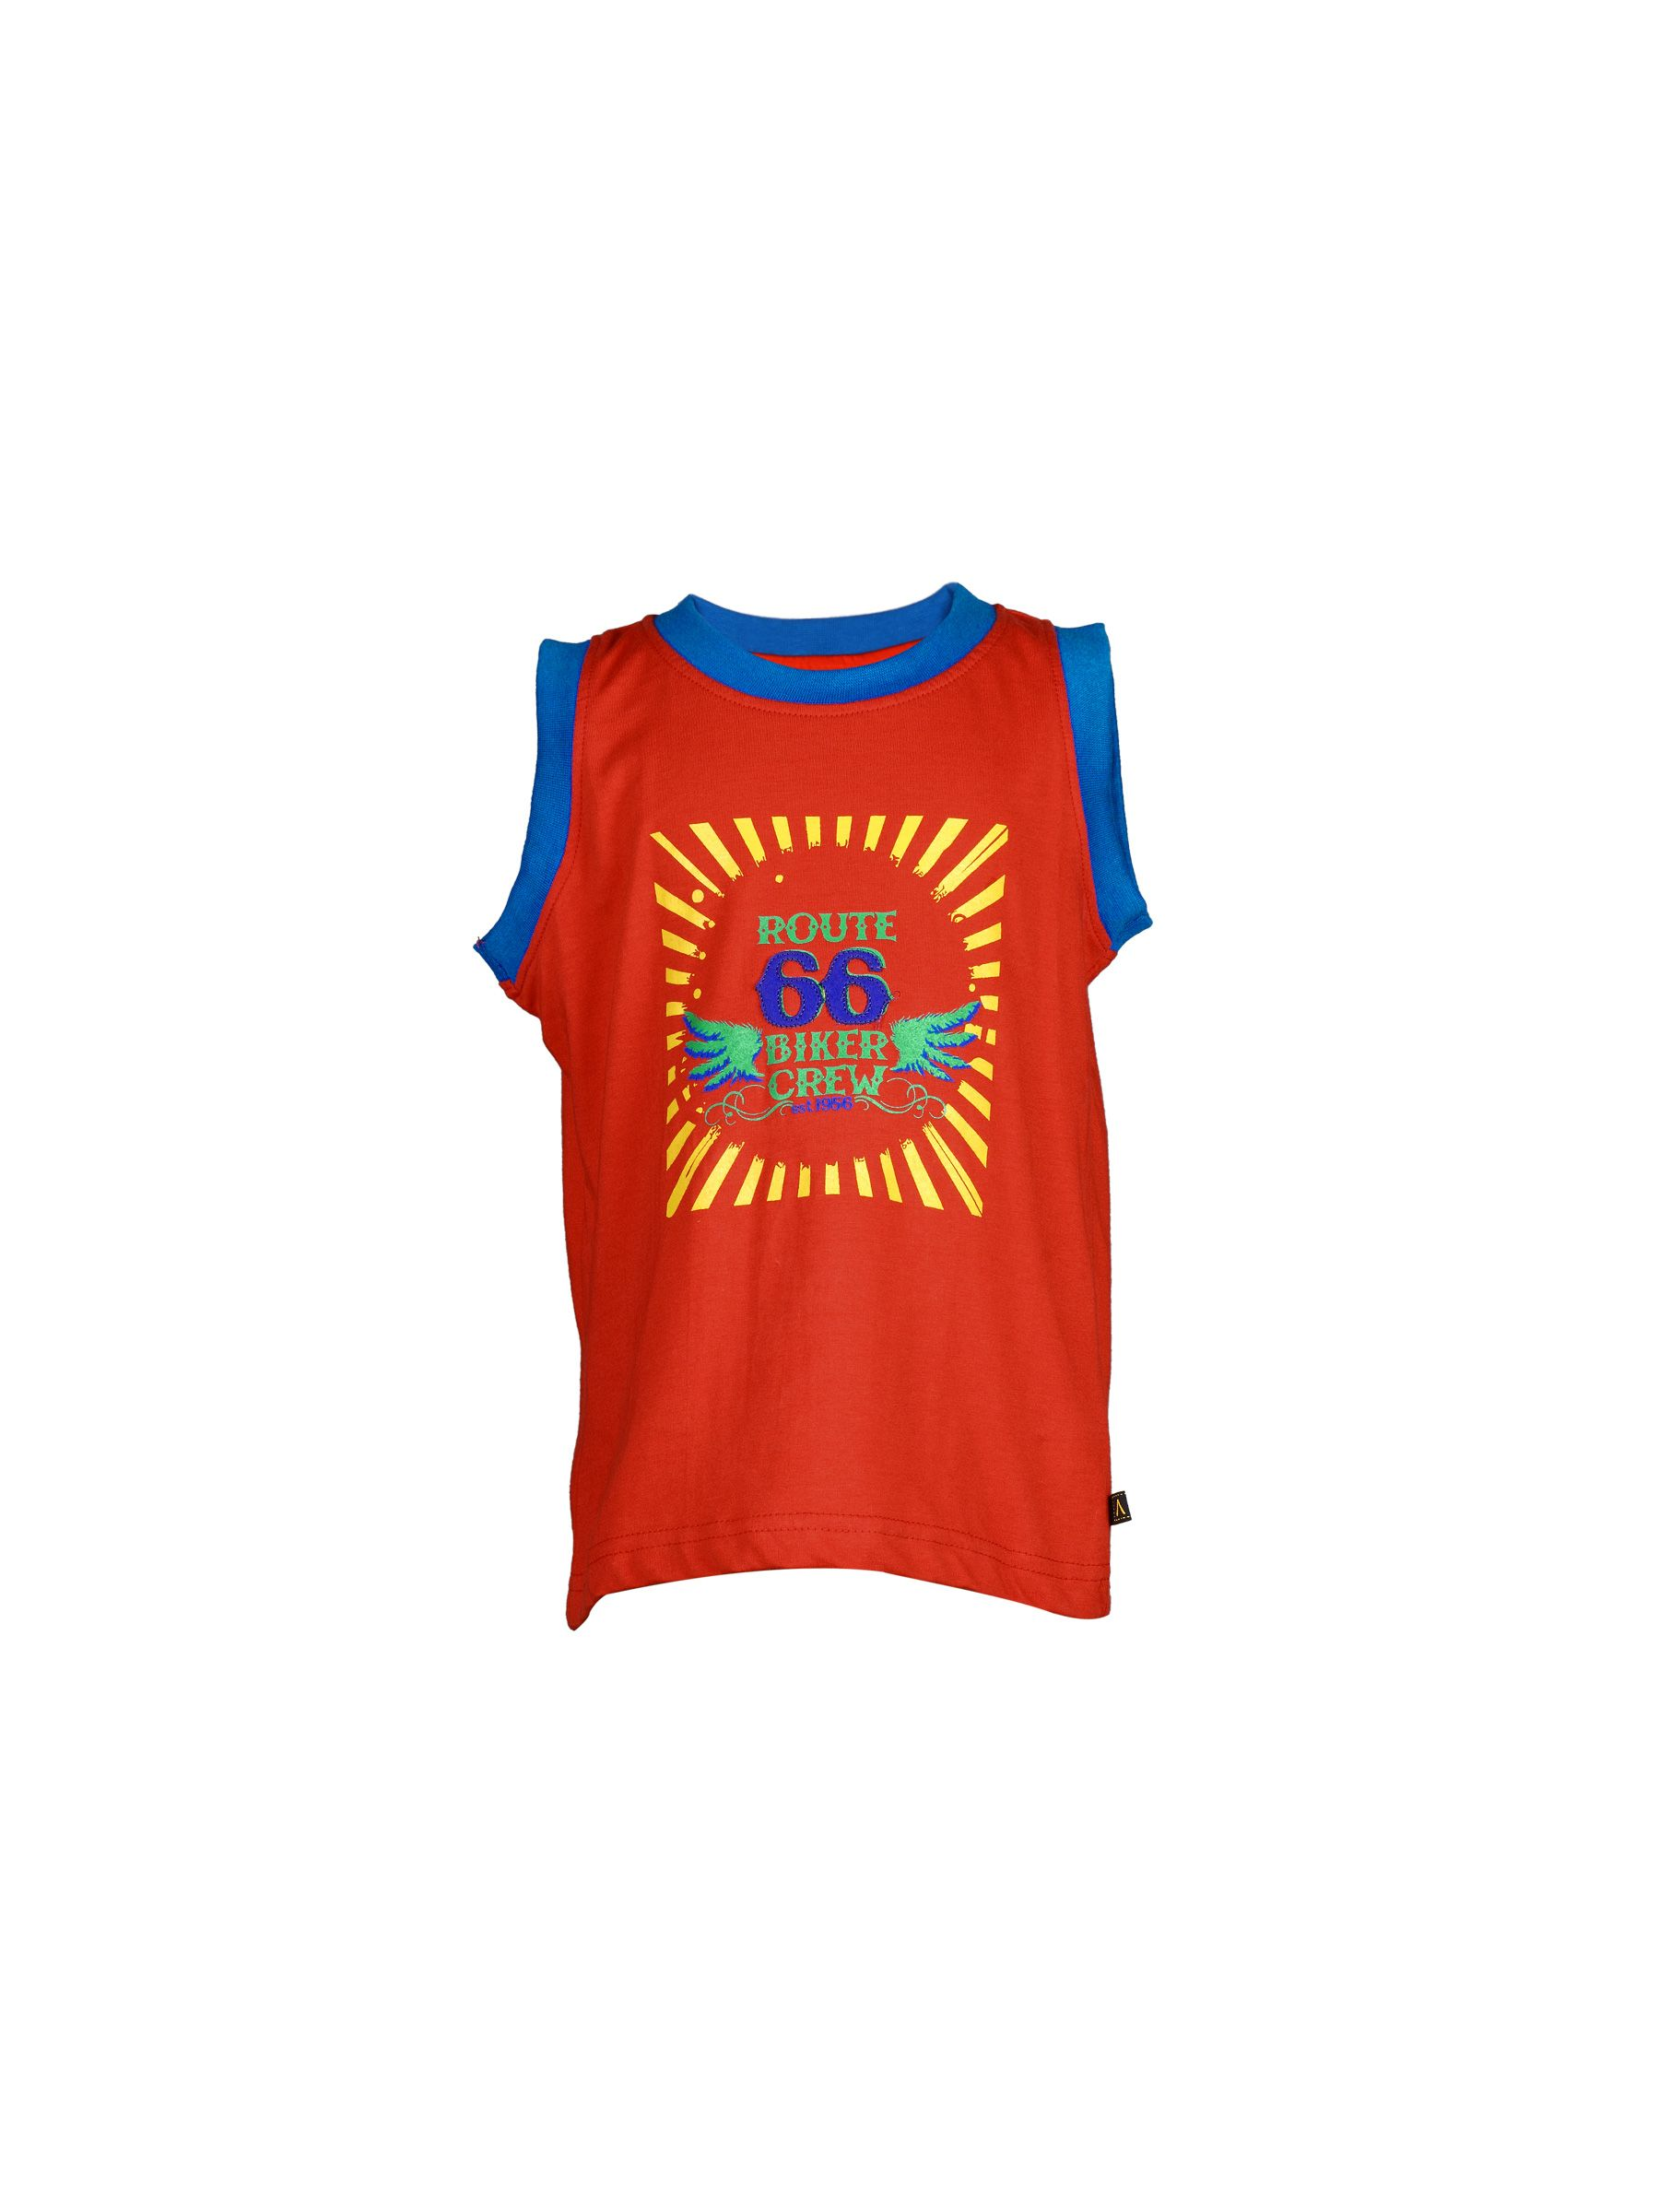

Product Title:  Doodle Boy's Route 66 Biker Red Teen Kidswear

 ==================== Recommended products ====================


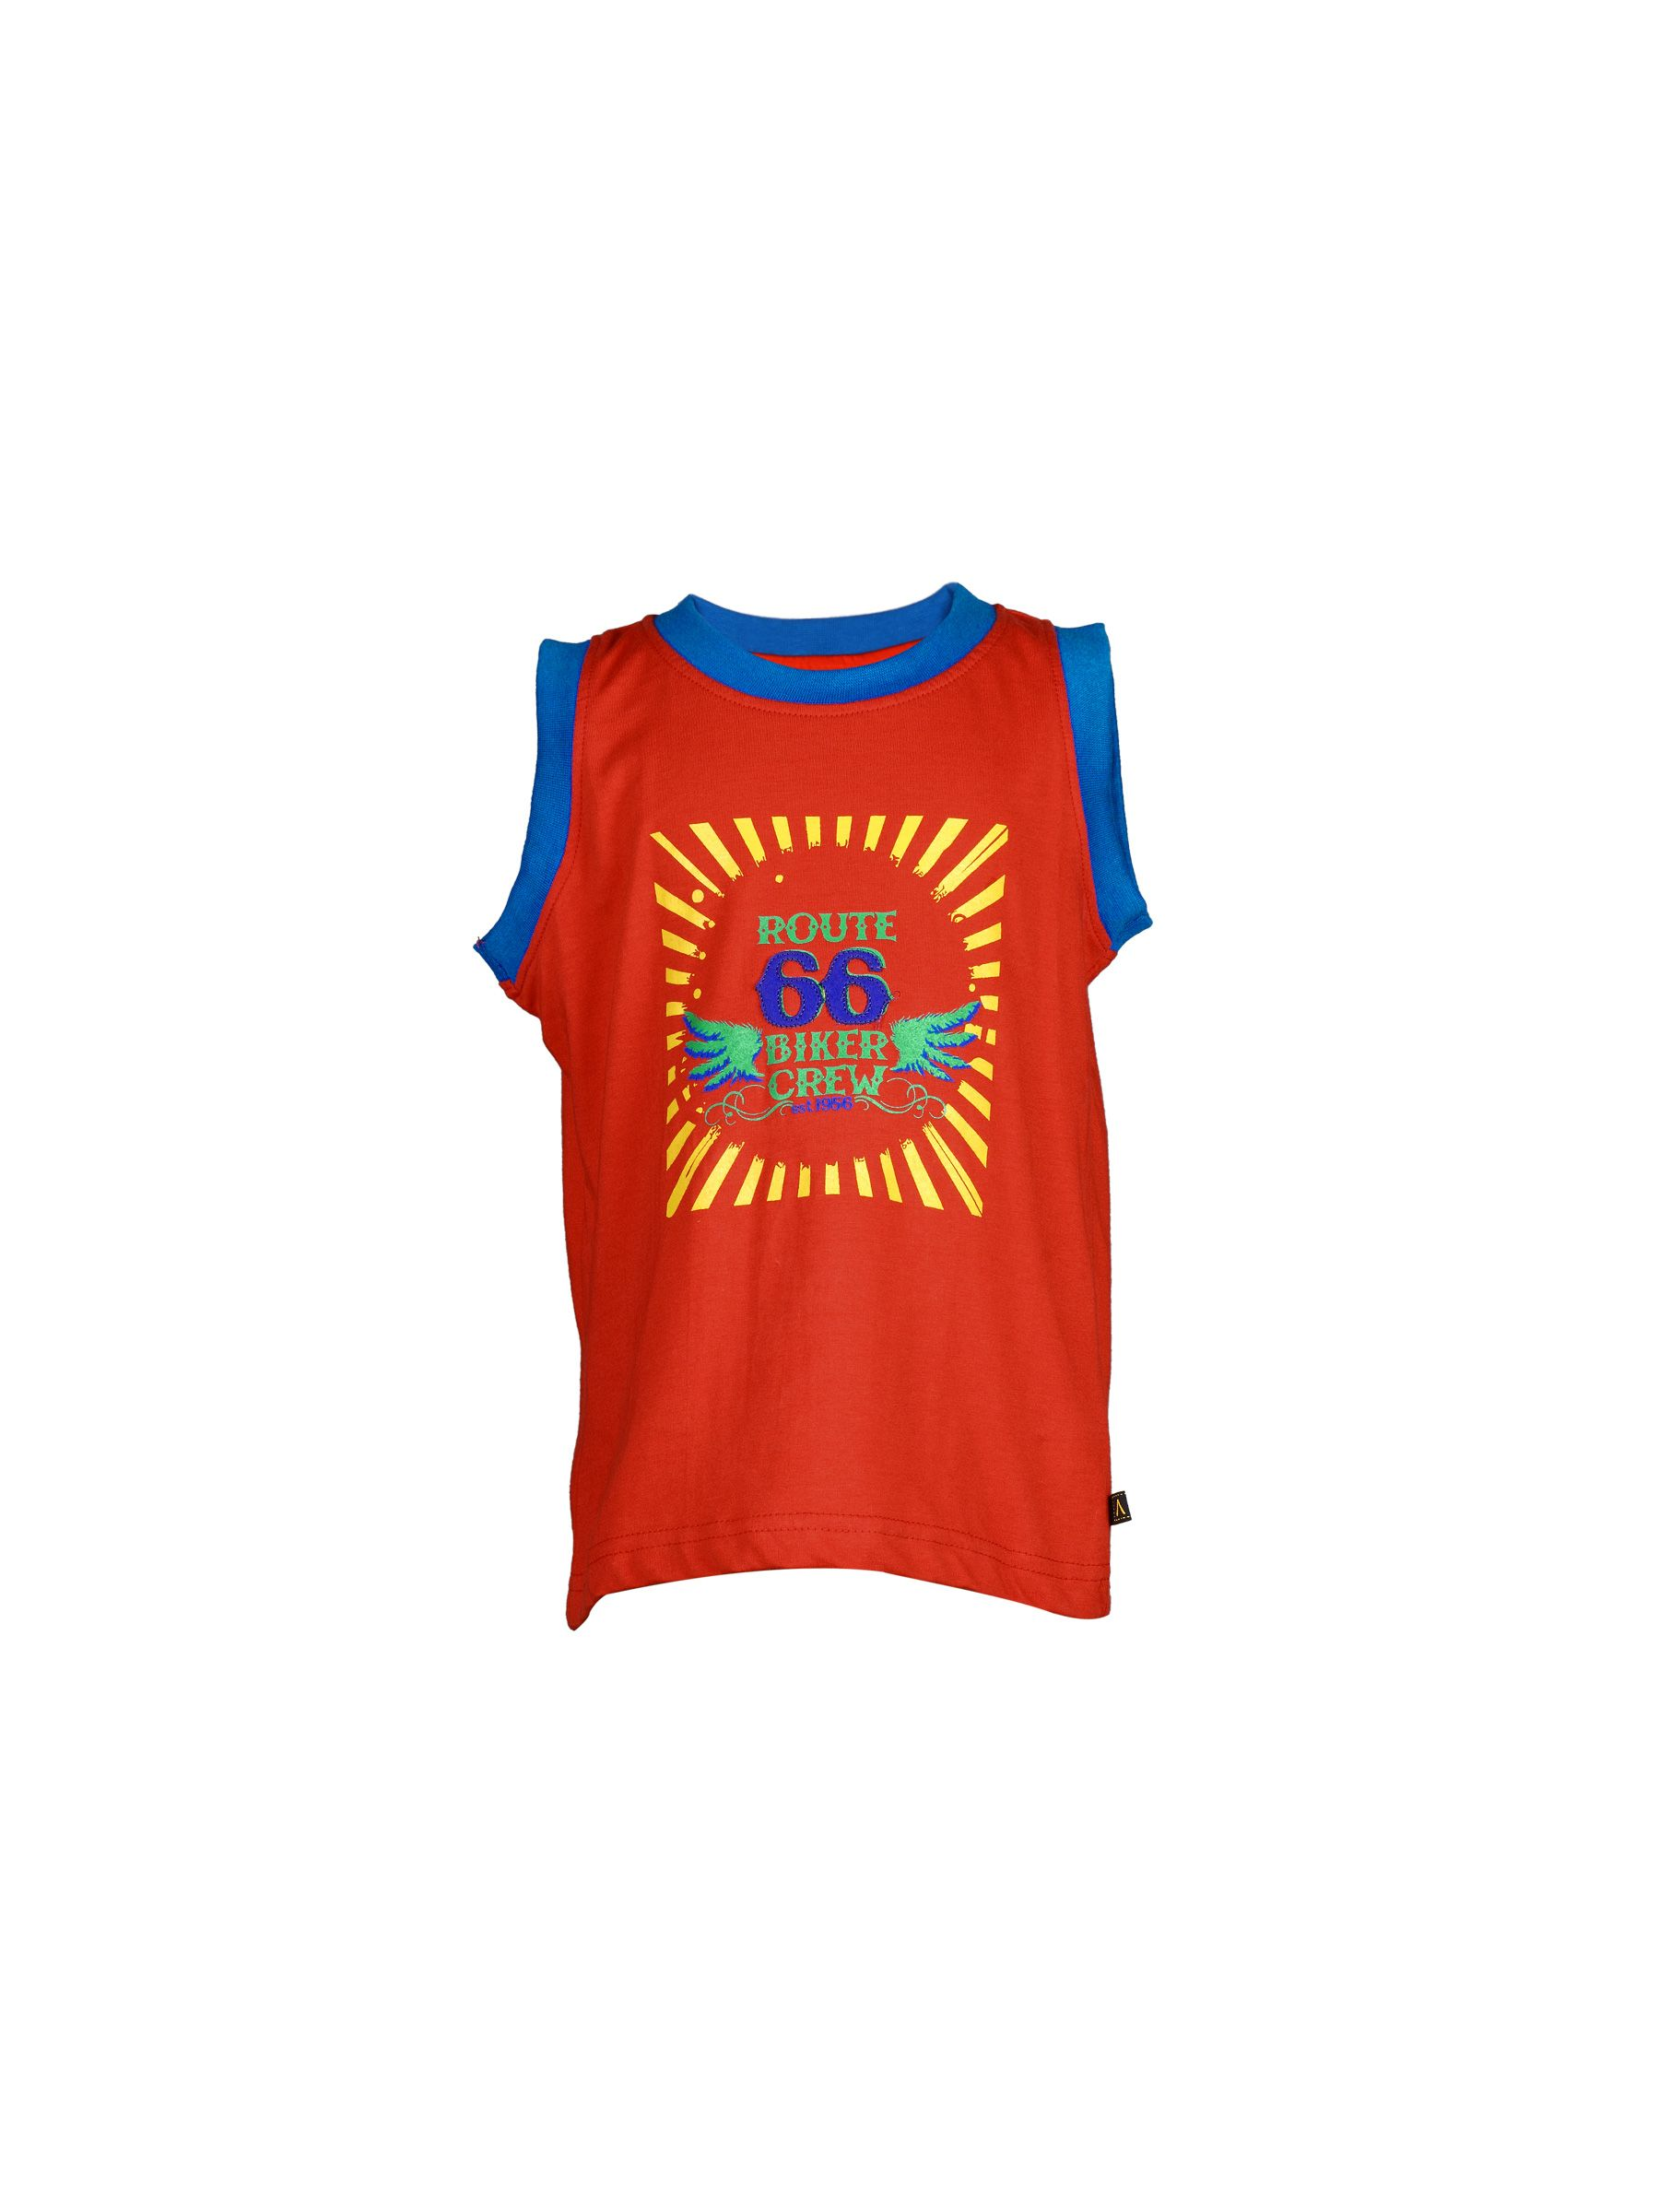

Product Title:  Doodle Boy's Route 66 Biker Red Kidswear
Euclidean Distance from input image: 1.265192e-05


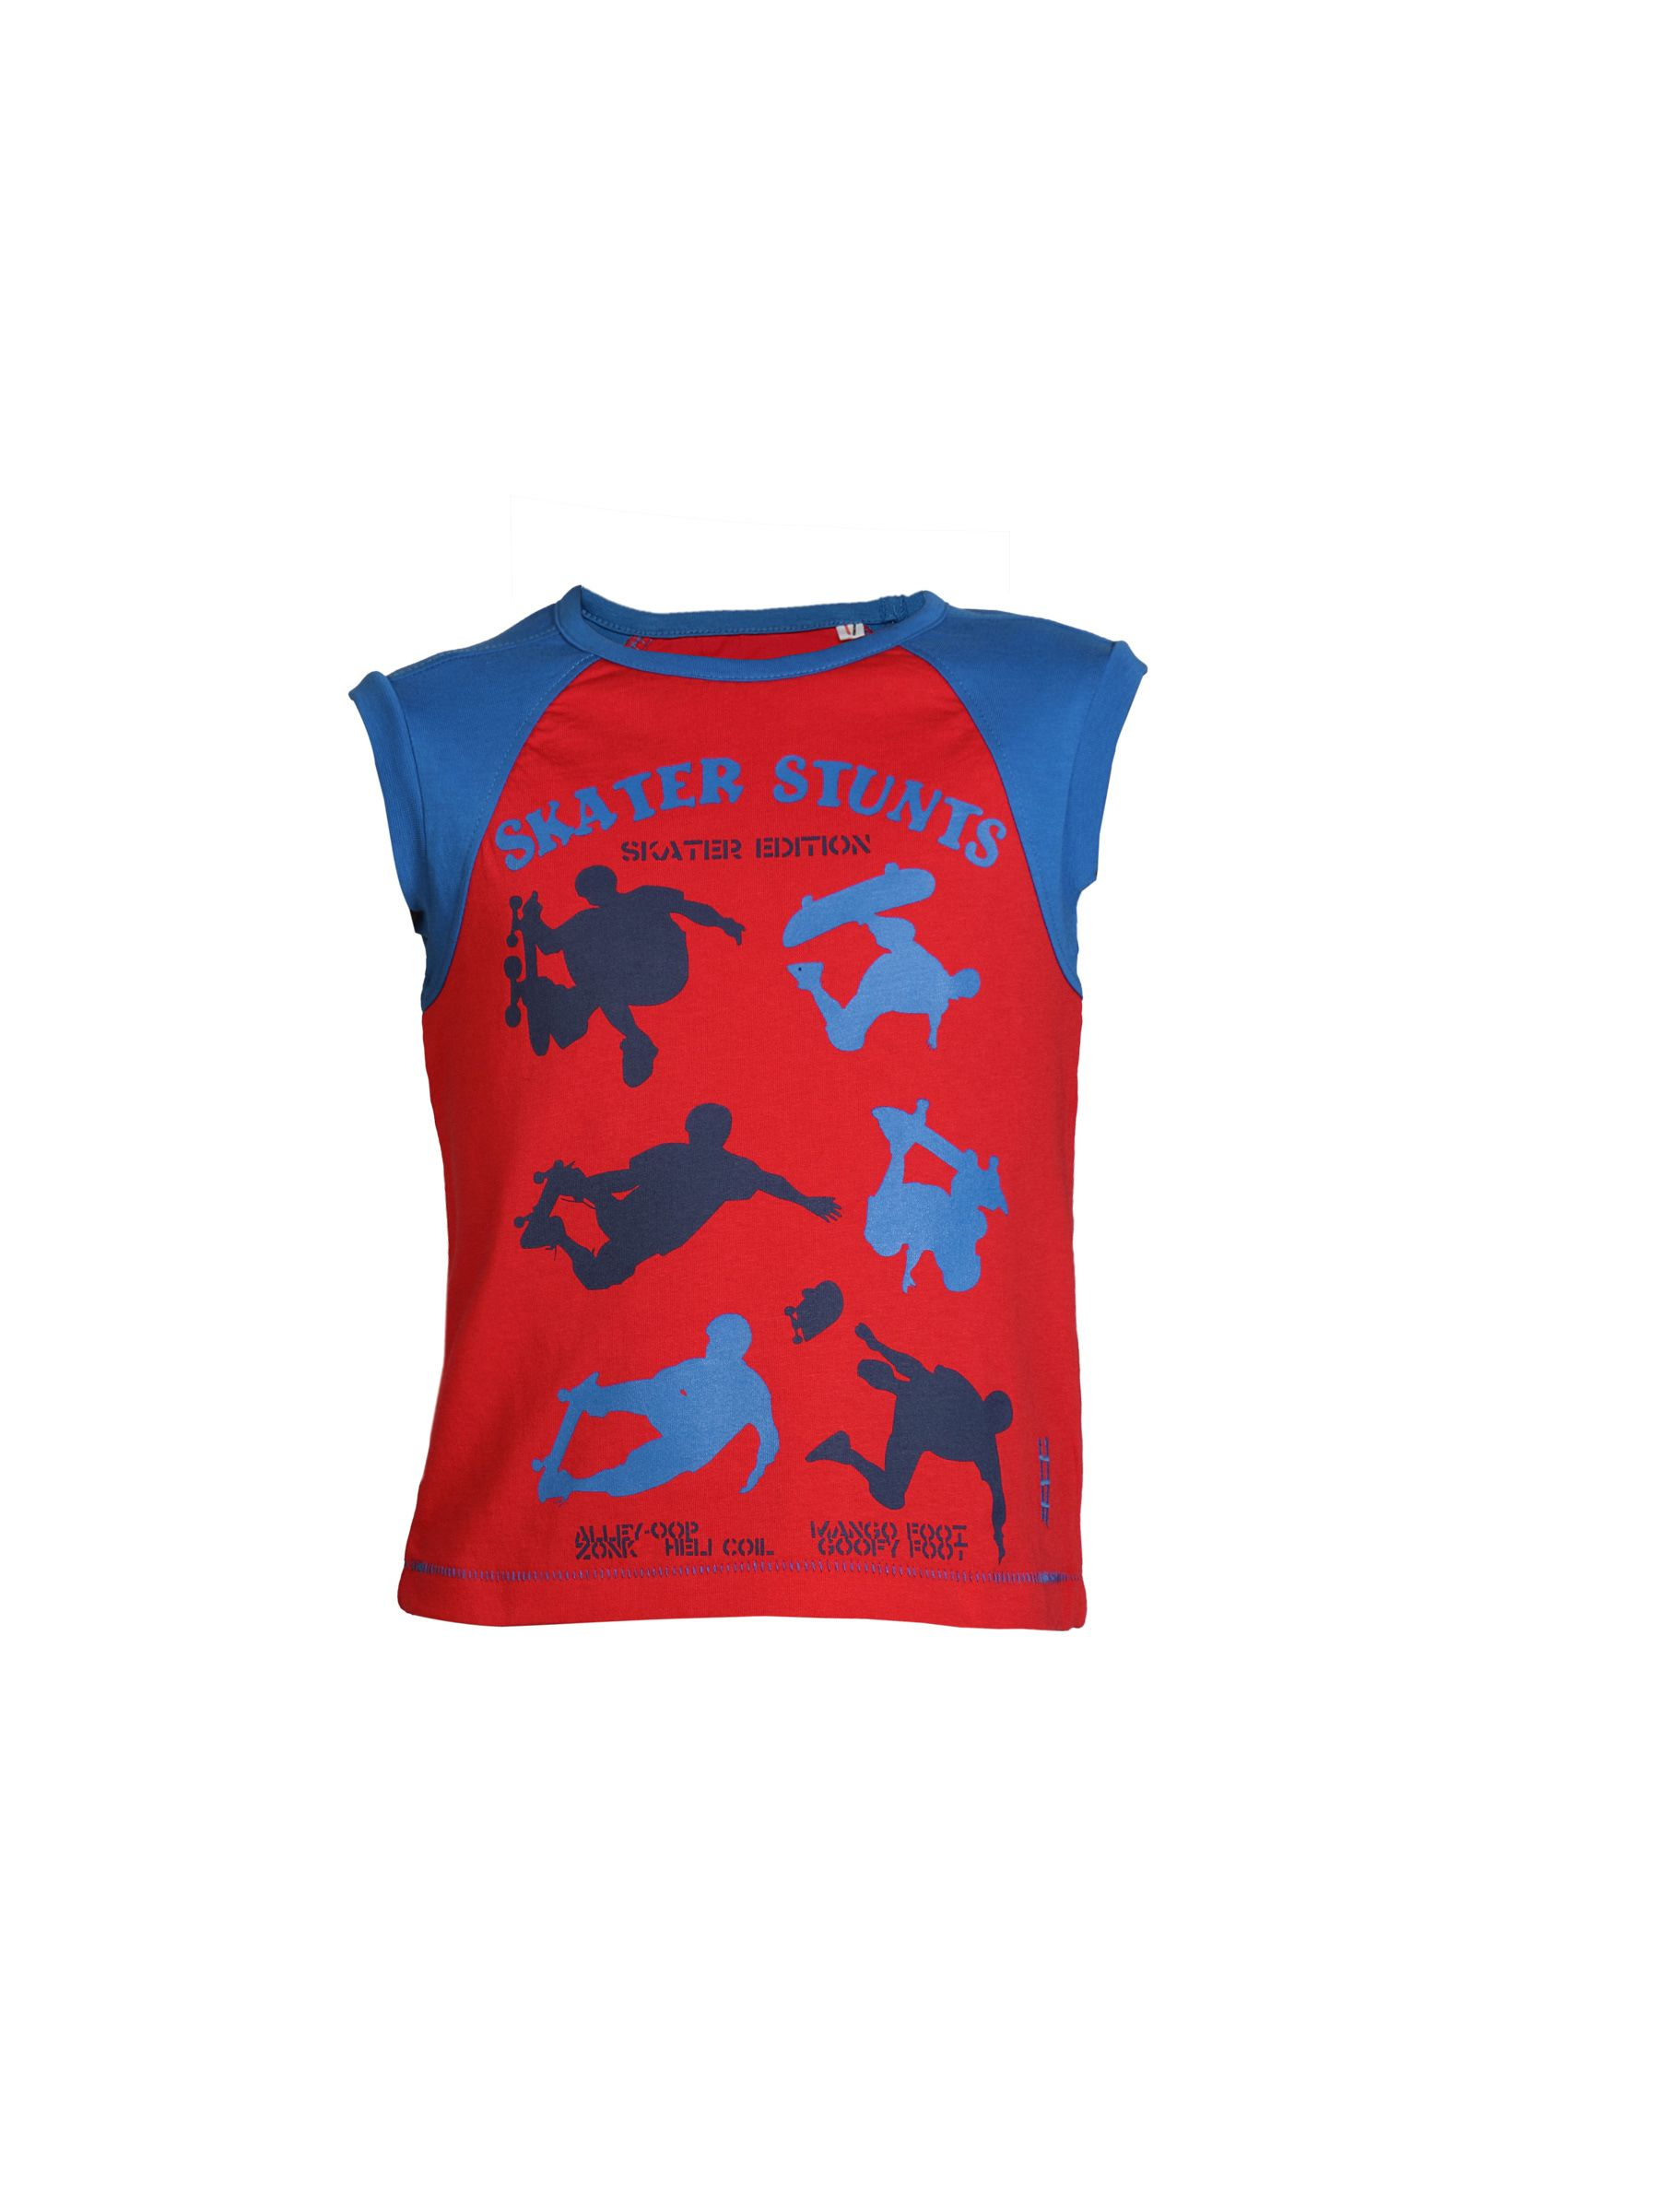

Product Title:  Allen Solly Kids Boys Red T-shirt
Euclidean Distance from input image: 28.964745


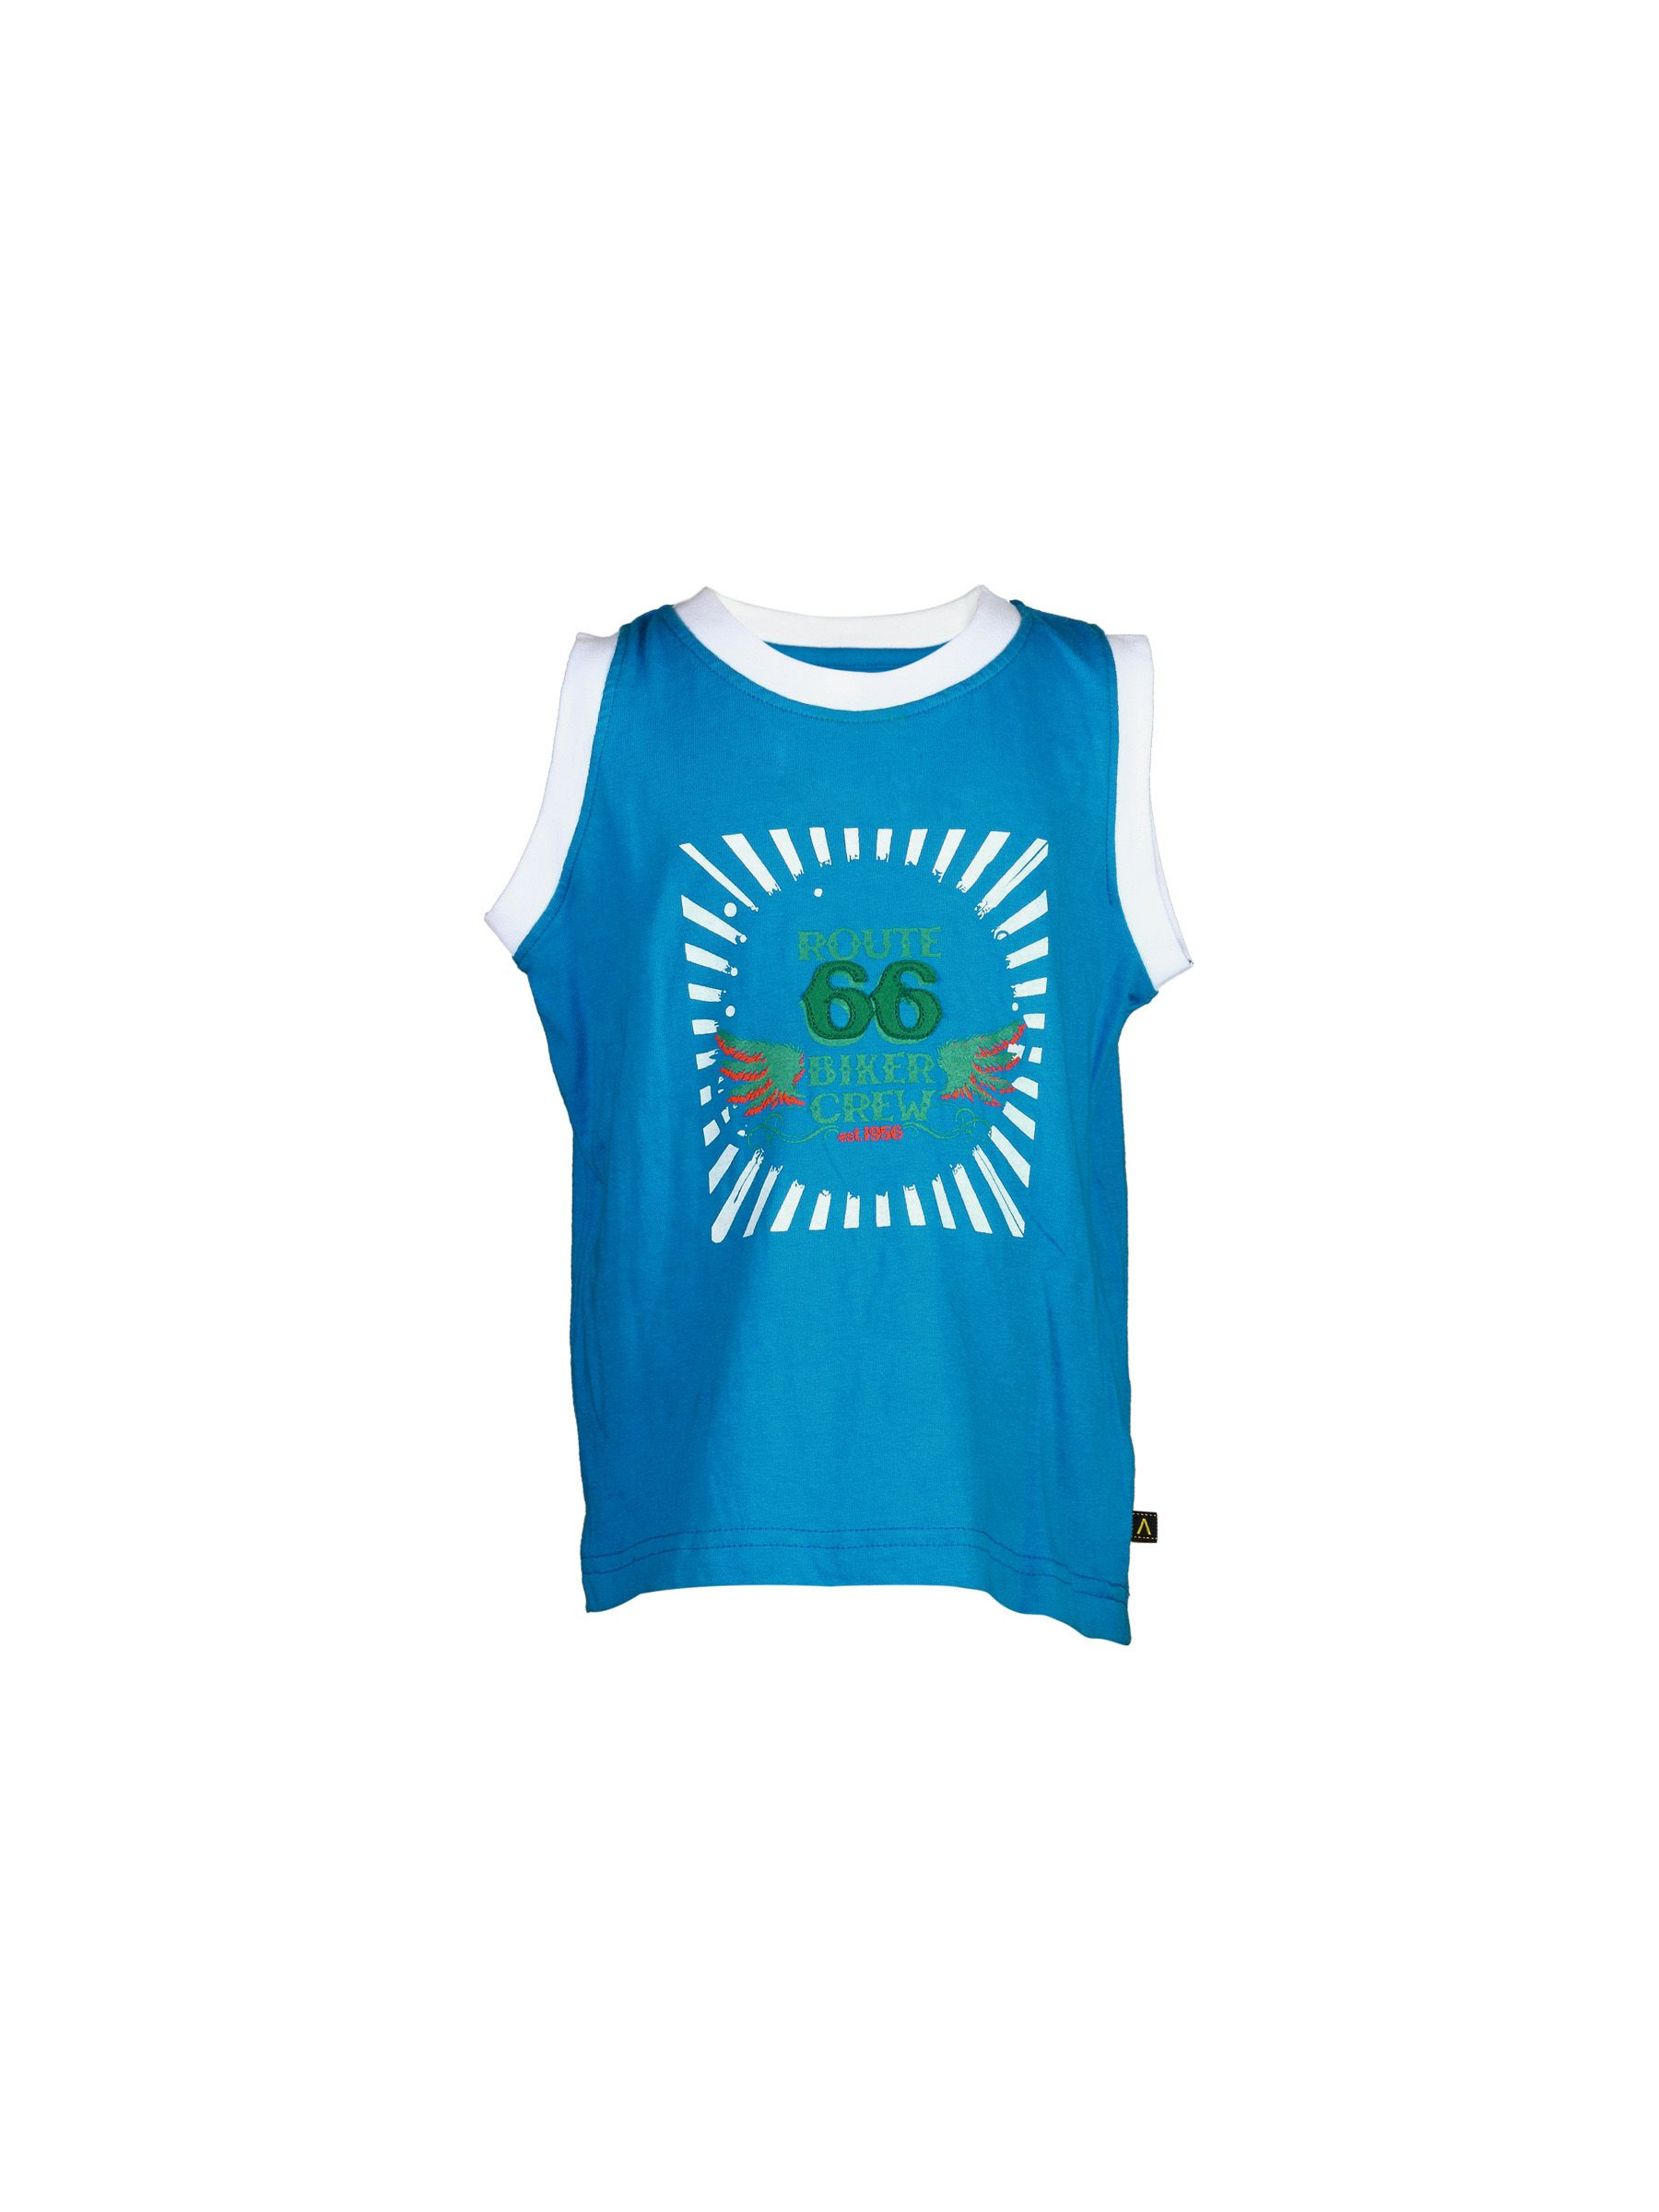

Product Title:  Doodle Boy's Route 66 Biker Blue Teen Kidswear
Euclidean Distance from input image: 29.399979


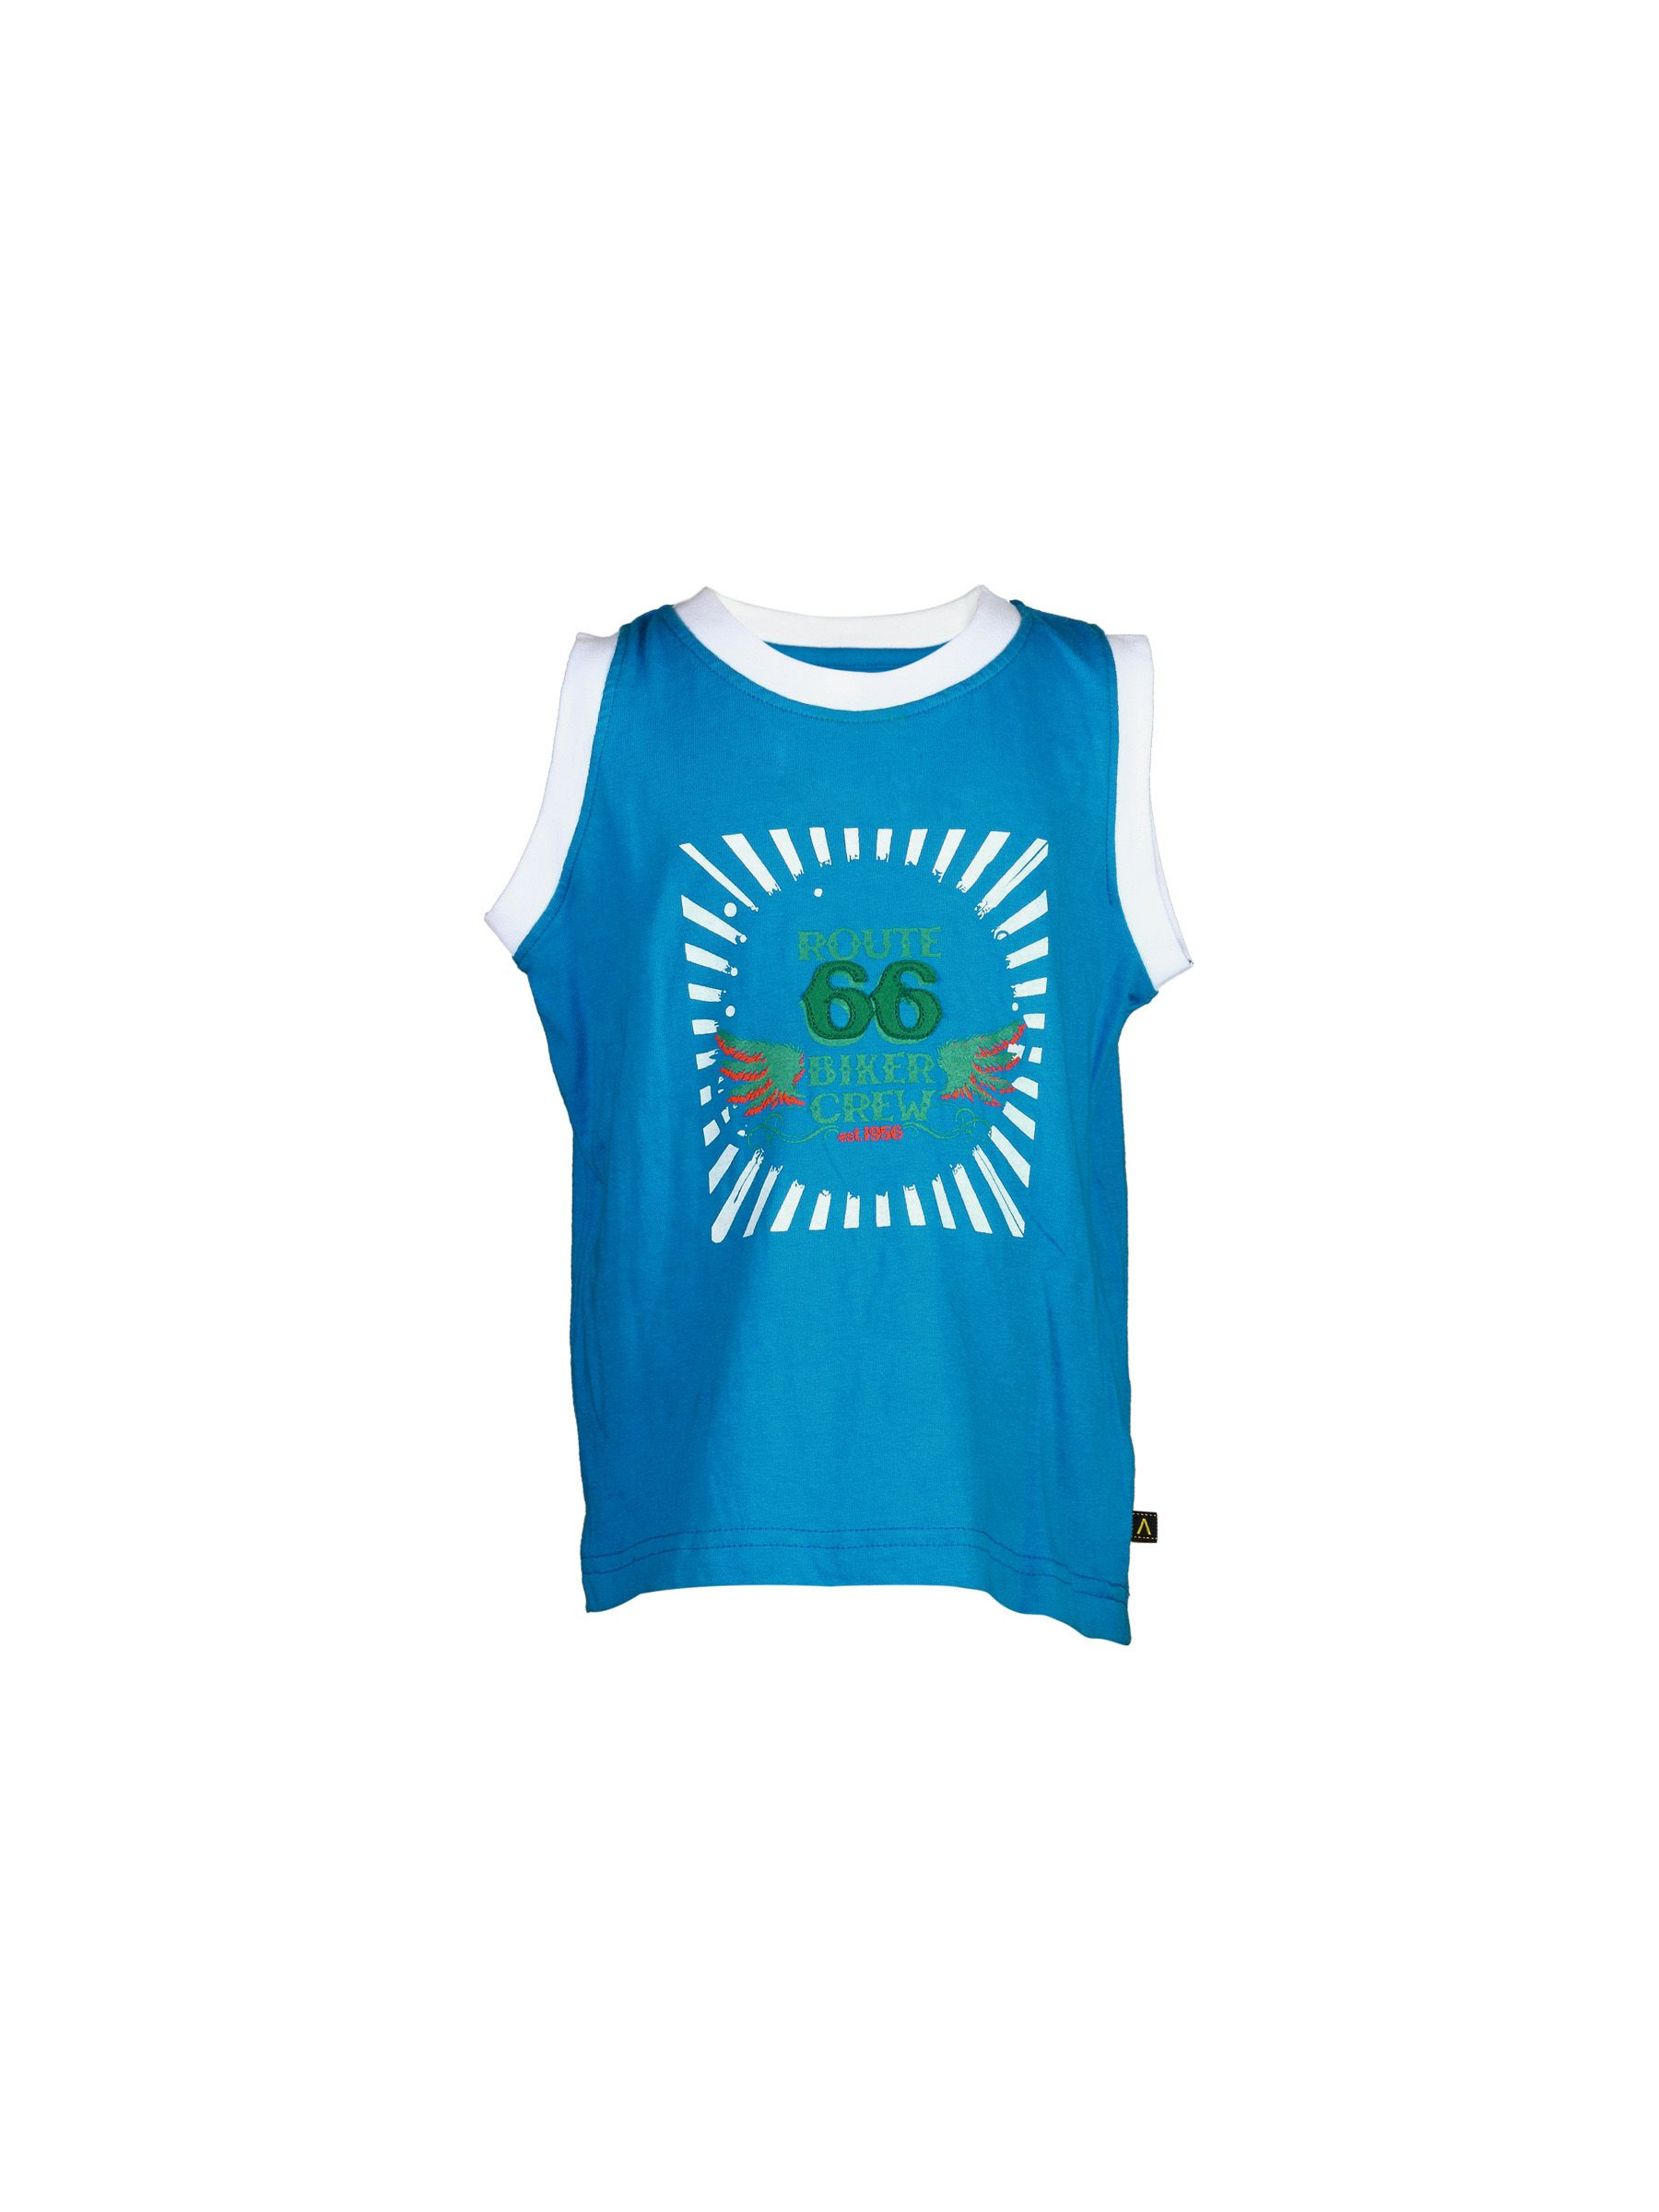

Product Title:  Doodle Boy's Route 66 Biker Blue Kidswear
Euclidean Distance from input image: 29.421005


In [21]:
get_similar_products_cnn('8319', 5)
